In [1]:
from torch import nn
import torch
import copy
import os
import random
import numpy as np
from torchvision import datasets, transforms

In [4]:
x = "123456_local"
x[-5:]

'local'

In [2]:
train_dataset = datasets.EMNIST('./data', split="digits", train=True, download=True,
                                   transform=transforms.Compose([
                                       transforms.RandomCrop(28, padding=2),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                   ]))

test_dataset = datasets.EMNIST('./data', split="digits", train=False, download=True,
                                   transform=transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                   ]))

In [3]:
train_dataset
# Dataset EMNIST
#     Number of datapoints: 240000
#     Root location: ./data
#     Split: Train
#     StandardTransform
# Transform: Compose(
#                RandomCrop(size=(28, 28), padding=2)
#                ToTensor()
#                Normalize(mean=(0.1307,), std=(0.3081,))
#            )

Dataset EMNIST
    Number of datapoints: 240000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(28, 28), padding=2)
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [4]:
test_dataset
# Dataset EMNIST
#     Number of datapoints: 40000
#     Root location: ./data
#     Split: Test
#     StandardTransform
# Transform: Compose(
#                ToTensor()
#                Normalize(mean=(0.1307,), std=(0.3081,))
#            )

Dataset EMNIST
    Number of datapoints: 40000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [7]:
x = torch.randn(2,2, 3)
x
torch.cat((x, x, x), 0)
torch.cat((x, x, x), 2)

tensor([[[-0.5234, -0.7344,  1.3374, -0.5234, -0.7344,  1.3374, -0.5234,
          -0.7344,  1.3374],
         [-0.4120,  2.4138, -0.1016, -0.4120,  2.4138, -0.1016, -0.4120,
           2.4138, -0.1016]],

        [[ 0.1074,  0.3094, -0.4569,  0.1074,  0.3094, -0.4569,  0.1074,
           0.3094, -0.4569],
         [ 0.5739, -1.0226, -1.1109,  0.5739, -1.0226, -1.1109,  0.5739,
          -1.0226, -1.1109]]])

tensor([0, 9, 7, 9, 2, 2, 3, 1, 0, 0, 6, 4, 9, 3, 8, 2, 0, 8, 2, 0, 5, 4, 9, 8,
        0, 6, 1, 8, 3, 7, 9, 9, 6, 3, 7, 5, 7, 3, 1, 9, 5, 8, 5, 4, 6, 2, 9, 6,
        3, 6, 2, 1, 0, 1, 5, 8, 4, 3, 0, 0, 7, 3, 7, 5])
torch.Size([64])


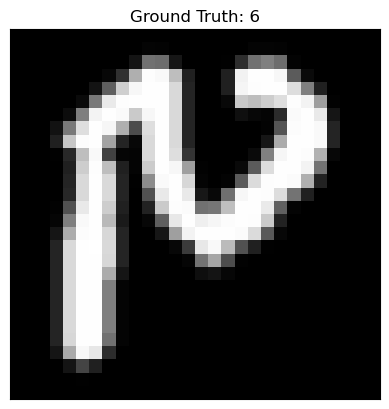

In [24]:
from torch.utils.data import DataLoader

batch_size = 64
# 读取测试数据，train=True读取训练数据；train=False读取测试数据
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

examples = enumerate(test_loader) #img&label
batch_idx, (imgs, labels) = next(examples) #读取数据,batch_idx从0开始

print(labels) #读取标签数据
print(labels.shape) #torch.Size([32])，因为batch_size为32

#-------------------------------数据显示--------------------------------------------
#显示6张图片
import matplotlib.pyplot as plt
fig = plt.figure()
plt.tight_layout()
plt.imshow(imgs[40][0], cmap='gray', interpolation='none')#子显示
plt.title("Ground Truth: {}".format(labels[10])) #显示title
plt.xticks([])
plt.yticks([])
plt.show()


tensor([[ 2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088],
        [ 2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088],
        [ 2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088],
        [ 2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,  2.8088,
          2.8088,  2.8088,  2.8088,  2.8088,  2.8088

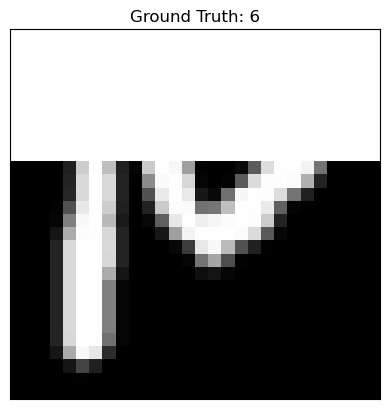

In [26]:

imgs[40][0][0:10][0:10] = 2.8088
print(imgs[40][0])

import matplotlib.pyplot as plt
fig = plt.figure()
plt.tight_layout()
plt.imshow(imgs[40][0], cmap='gray', interpolation='none')#子显示
plt.title("Ground Truth: {}".format(labels[10])) #显示title
plt.xticks([])
plt.yticks([])
plt.show()

0.3%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])
torch.Size([32])


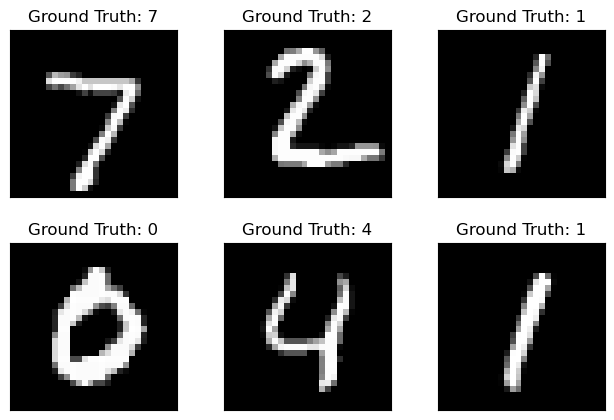

In [5]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

batch_size = 32
# 读取测试数据，train=True读取训练数据；train=False读取测试数据
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_tf, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_tf)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

examples = enumerate(test_loader) #img&label
batch_idx, (imgs, labels) = next(examples) #读取数据,batch_idx从0开始

print(labels) #读取标签数据
print(labels.shape) #torch.Size([32])，因为batch_size为32

#-------------------------------数据显示--------------------------------------------
#显示6张图片
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.tight_layout()
  plt.imshow(imgs[i][0], cmap='gray', interpolation='none')#子显示
  plt.title("Ground Truth: {}".format(labels[i])) #显示title
  plt.xticks([])
  plt.yticks([])

plt.show()


# trigger选择的index

In [27]:
trigger0 = [822688, 904920, 2555299, 2444013, 2588410, 712683, 2672959, 2275523, 1541236, 907679, 2581850, 1887329, 641683, 1370238, 1456950, 1247140, 2785881, 1091538, 1291324, 1765891, 2495674, 1094100, 2753413, 1330312, 2108295, 2527751, 1136450, 1422577, 247138, 1171853, 822736, 407319, 1275632, 2242289, 1988941, 2314678, 1916057, 2597467, 1894052, 2670376, 2303421, 1808417, 2332686, 2557812, 2451595, 2418498, 1628377, 2550439, 2482755, 1137616, 2706200, 2435104, 2632423, 747757, 2408428, 789578, 1380375, 2150901, 1561220, 2184890, 967068, 718001, 1077028, 2304765, 2367188, 1270872, 2522620, 2420568, 2277264, 2020056, 1970806, 731212, 2492494, 2124835, 2539148, 1065731, 2167384, 1841238, 2464236, 1009791, 2039915, 856467, 2644585, 1398762, 2223560, 2207710, 1017932, 2749150, 2436419, 2794966, 1501649, 2227852, 1826989, 2046437, 2482716, 1274307, 2739777, 449691, 1659942, 1147602, 659118, 535986, 1348333, 155035, 1533019, 1170141, 1506302, 1180179, 411127, 537823, 1203547, 2633897, 2232119, 1455447, 2527865, 2017382, 2597904, 1331096, 1007228, 2743453, 2728027, 756705, 1736170, 930416, 1894673, 959669, 2243096, 2199398, 2199763, 709240, 1824294, 2626147, 1306568, 1675616, 2760296, 2265930, 2486408, 2617281, 966554, 1362066, 2612791, 1886661, 2760657, 120365, 2686540, 241766, 2528583, 1285657, 2250607, 2317260, 2036938, 2463141, 995309, 1777275, 2635001, 955574, 1804053, 1581435, 2649667, 1479436, 2334509, 2698226, 2041414, 1714754, 404866, 2760023, 2303073, 1180744, 1465332, 2722218, 2508099, 2271874, 2717049, 2072106, 113838, 2123030, 2342139, 1083025, 2738975, 2141966, 202180, 2604425, 1587351, 793780, 2383808, 2490752, 2454004, 2481369, 382362, 2731046, 1220143, 95226, 2525316, 1988868, 2115154, 1497717, 1400102, 2748751, 1815298, 155521, 2561387, 1379495, 1809248, 2100980, 145937, 2026889, 1943554, 2211411, 2295961, 2084765, 2437396, 1453469, 2630034, 2762638, 94825, 708117, 2290017, 1121570, 1878754, 383499, 2165988, 1329833, 1543862, 1202032, 2687559, 1029812, 540667, 2730564, 2606684, 751079, 2013846, 1322524, 818033, 1807286, 1418868, 1214595, 883509, 2564720, 2548261, 2656790, 424275, 2662180, 1687121, 2626779, 769490, 1703088, 2200470, 1089203, 2041306, 1275458, 2745895, 626717, 1699055, 910944, 1843370, 1180897, 123235, 1612619, 2253488, 1172240, 317331, 2336800, 797187, 871937, 2538047, 747779, 2665077, 1917534, 1747034, 1986920, 1408885, 2081196, 2569052, 1755536, 1596024, 385431, 1672961, 2016070, 2613855, 2279178, 2132188, 1717574, 2598688, 370402, 1980633, 1809278, 1612198, 1120137, 1301446, 1627102, 1549018, 2771679, 1089643, 1920232, 2537881, 2330000, 2419046, 1855085, 1616534, 1335430, 1156670, 241084, 2283482, 1716501, 2183498, 296324, 1094550, 1015528, 715586, 2558284, 2622868, 2618140, 2536417, 2482714, 1700465, 2351623, 1016281, 1827056, 2038108, 2310124, 1163085, 1224525, 2350866, 783018, 1480510, 2556154, 2554403, 1778580, 2700505, 1947223, 1468165, 2272642, 2234514, 1887390, 376811, 1464186, 2142432, 2195655, 1970619, 2772882, 710432, 2598880, 2589057, 1672203, 1516176, 1752603, 881444, 1406286, 1670484, 759066, 1810821, 2754532, 1114204, 1205299, 728862, 1096660, 2507129, 2419537, 2182673, 1728387, 2203192, 943956, 1439644, 2210300, 826342, 1220343, 1703119, 1057168, 2660367, 2162857, 1126767, 2481037, 1066719, 2280655, 1031696, 2699636, 1324097, 1447600, 820561, 2323322, 1995164, 1108477, 1465447, 2743682, 1714911, 2137670, 2236779, 1418313, 2534728, 1257527, 2265022, 1492806, 2609910, 2137167, 628676, 2792210, 924060, 960516, 113912, 599192, 1481696, 265285, 2553481, 2501976, 1459088, 2700117, 1076915, 2727793, 1330184, 1174627, 1675653, 2544162, 2108260, 2455884, 1648661, 2235147, 78808, 2483603, 2266228, 1516490, 1227811, 310892, 566488, 700437, 2470605, 189148, 2023794, 1236777, 1856844, 2645770, 2526526, 2318117, 1312090, 2556239, 1172665, 741248, 859202, 1062608, 2610434, 2748597, 2428553, 2531994, 2552731, 2771525, 1273317, 879323, 2018435, 1837091, 2544714, 1412980, 1763608, 2223503, 2778876, 714295, 1245453, 2792981, 2666520, 1239180, 1964363, 1674288, 2231507, 221699, 2745419, 2003587, 1022251, 2069085, 2342998, 2754668, 1570062, 2404994, 1087476, 2748319, 2760563, 707906, 2731256, 2510491, 2626146, 2430849, 323169, 1505334, 1380224, 1098078, 2389211, 1236125, 2031078, 1521332, 1311124, 318492, 1507623, 1111768, 869693, 1963008, 1880139, 2386406, 2763820, 1765938, 2674769, 1484153, 130429, 2361291, 209374, 2343756, 1761523, 2452786, 1544346, 48836, 2066092, 645479, 2153867, 1887720, 422496, 2640075, 2431823, 2651796, 2163266, 2104102, 2228891, 1158219, 976697, 428885, 1367710, 2443341, 483328, 2422513, 1395155, 1335972, 2317869, 2247076, 2666231, 1066309, 1791008, 2135314, 1627520, 1925635, 798530, 1918749, 2564053, 1433496, 2450505, 1142237, 1813860, 1875205, 2316877, 2769906, 1639476, 1637664, 2786920, 2127935, 2040055, 1789855, 1707030, 1163569, 2095046, 2766512, 1265800, 2041624, 2418326, 1912999, 2213093, 1368844, 258627, 1876776, 2236746, 1905103, 2066218, 1850668, 849684, 1511644, 859236, 2653295, 1142085, 2429496, 2675714, 1132627, 826071, 2350132, 2552029, 738825, 2472987, 1172284, 2237334, 1961961, 1437007, 1150394, 2169362, 2553409, 1476733, 1037209, 1051195, 2007409, 1157378, 390968, 1838808, 1145968, 1989112, 1388269, 2565957, 986001, 649176, 937180, 1931247, 2009181, 2067973, 1272374, 2578874, 1038276, 1798132, 359619, 1289133, 1371579, 2775856, 1203781, 2617039, 1484716, 2332687, 1687679, 1544937, 1463571, 2300571, 2249804, 2267110, 162597, 1958059, 2204222, 2736760, 2646619, 1933924, 1998986, 158934, 1935216, 2712053, 2311328, 2739368, 810300, 2373742, 1781934, 1702270, 1095808, 2246612, 1359876, 2719250, 469488, 2774592, 1533637, 2565496, 1605332, 1867522, 690334, 1650393, 1444371, 1763375, 2664202, 709658, 1260136, 1656028, 2252556, 1771629, 2245797, 2395667, 2712125, 2438685, 758332, 2459740, 1215722, 2350133, 2683312, 2373996, 1939745, 2097897, 196801, 2485828, 892796, 1703952, 1543265, 1720935, 2114357, 2691149, 494686, 747193, 2106541, 955655, 1325001, 2370084, 1906771, 2153383, 1079092, 1979187, 2420909, 831703, 2298245, 2525741, 723457, 2268407, 538006, 1275252, 1398755, 2751902, 2168006, 2035699, 2226510, 1602275, 2143374, 695906, 1121578, 2758034, 2369271, 2727803, 1462794, 797606, 721047, 1901886, 1990202, 2257302, 1197119, 2310447, 1800485, 1503468, 360315, 1035931, 955492, 1666396, 2519847, 2033901, 701189, 2684434, 1025796, 2231614, 752430, 1650400, 1842028, 1017978, 2095002, 1705407, 1073733, 1080082, 2321594, 1929995, 648344, 1384877, 1280479, 2294071, 1974892, 2248837, 1112147, 991616, 2317241, 2069595, 1722072, 2782773, 1848146, 1887919, 656207, 2183760, 2662295, 1166873, 1440641, 1150423, 566165, 1563651, 1329606, 1660850, 2325278, 2495088, 2344431, 1942376, 2029483, 2768831, 2167722, 1438489, 1553506, 756334, 1103993, 1727262, 853889, 1828080, 1272619, 810420, 2183926, 2243912, 2240896, 2067101, 2565350, 1830487, 2675465, 2628391, 1641125, 2452917, 819988, 2051659, 1001533, 1595048, 2600074, 2008267, 1077609, 1189293, 1717794, 720771, 1813316, 2692410, 1077529, 2674312, 2578357, 2632960, 2773575, 2749575, 1791126, 1091421, 2457589, 703072, 2566963, 923284, 2465543, 1675134, 2459727, 2725070, 2081731, 1079800, 1761071, 268924, 1820365, 1850924, 2556212, 1224840, 242456, 2496018, 1034852, 2410485, 1464482, 2258036, 2272618, 2666181, 1955315, 269125, 813628, 2356115, 972155, 1710993, 2333631, 2082621, 2677322, 1565330, 1861237, 2047101, 1925566, 2490969, 1787140, 2454701, 2667507, 2649021, 2681821, 780529, 385756, 1299277, 2693258, 2716036, 2360807, 140702, 2401189, 2307487, 1676587, 1263865, 2035276, 1893827, 209246, 1655087, 2229849, 2623370, 1506885, 634397, 2646919, 1501823, 393999, 2448927, 2325243, 712249, 1318606, 2446878, 1623525, 1714652, 1368575, 1264291, 2714470, 2487117, 1351918, 2327814, 2361477, 799322, 1782267, 1223770, 1607466, 1997091, 1962493, 1711783, 2287237, 2212528, 2474065, 2243068, 2637054, 1087776, 2678334, 311934, 1338555, 2052912, 1383495, 329983, 1105106, 2424837, 274362, 1263513, 1202411, 1556061, 1657382, 722595, 1379610, 663509, 1320126, 1300850, 1366736, 1074585, 2577609, 422545, 2655564, 769318, 1109103, 397377, 2227106, 1275528, 1687747, 2200449, 2254344, 1525483, 2618715, 446931, 259357, 2653736, 2387986, 2649006, 2090230, 2332539, 1707814, 902465, 1464435, 1550946, 2368207, 1076666, 2225174, 2488209, 547826, 1195698, 2179629, 2326703, 2239177, 2155674, 926523, 2441817, 1469663, 2374899, 2084203, 1937890, 1943516, 2042389, 2232693, 2487293, 1764669, 1482727, 1649353, 1686751, 738933, 1103881, 2355470, 951959, 2298679, 1552000, 1349405, 1015847, 580461, 1927468, 1090894, 2431282, 1727174, 2515925, 2681516, 2790387, 2325270, 2070933, 1887722, 2736352, 2474011, 721018, 1298154, 1700099, 927851, 1818953, 2387076, 2051924, 2520268, 1885947, 2633658, 2545967, 1777797, 819115, 1358608, 2173857, 1401818, 2287072, 2438582, 2791824, 2266818, 1506449, 1874191, 2016952, 247811, 1880154, 2033129, 2537722, 1061403, 2339430, 760272, 1005462, 2189092, 2659729, 593434, 1804787, 2343453, 2699362, 1581502, 2420450, 498126, 284062, 1881686, 943478, 2719536, 2425434, 2556881, 2761436, 1763185, 2261649, 2611471, 899722, 2072098, 1196872, 2283107, 2632551, 1217984, 2495545, 2441808, 141802, 2368801, 1261695, 743910, 2484975, 2294397, 1387248, 1830394, 1792928, 1532529, 2274699, 2717267, 2752699, 2137368, 227807, 1091089, 2070349, 1879324, 2537534, 1865804, 1461535, 883607, 2025764, 2324838, 409628, 731595, 1800970, 774710, 1525752, 380034, 2155709, 714292, 1918757, 887431, 1264350, 2613831, 56562, 1657646, 2489371, 2527759, 2104608, 1728680, 1666627, 2582273, 2392881, 1424182, 2786381, 2284232, 605584, 872032, 1695749, 1534993, 1352919, 1857743, 1079573, 1707013, 2296265, 1905170, 1306038, 2582702, 666077, 1632118, 2518901, 1280666, 2200731, 2601091, 1070730, 1347592, 1894197, 1491143, 1041801, 1081463, 648864, 411110, 46891, 1092054, 1009625, 2631619, 42531, 1895906, 2741512, 1112318, 1273377, 2285334, 1520025, 1371981, 1927387, 2704748, 2400365, 540959, 2243312, 508800, 1094667, 2440660, 2791442, 2188213, 2489297, 2362173, 1661506, 1910728, 2301245, 2682570, 2263354, 272518, 2769697, 2616006, 1820306, 2057418, 457071, 1675740, 1964947, 1921828, 332817, 77056, 2739166, 1859470, 385046, 1359115, 1917081, 886062, 2122725, 1321142, 2526266, 1712511, 2119984, 1031881, 1260644, 2481494, 1444609, 966371, 2789780, 1461123, 1199401, 1169949, 1017411, 2758522, 1087106, 976714, 1162482, 2786760, 735890, 1802027, 858679, 2481961, 2072538, 1040308, 899102, 2570022, 2655502, 1089468, 2445919, 1862155, 2505764, 1376294, 409313, 2155846, 2634869, 789335, 322544, 1351735, 2400780, 1662894, 2539322, 448127, 1816480, 1877954, 1832437, 2204321, 2759157, 2573592, 2067553, 2429952, 1265361, 876256, 1216113, 1667167, 1580586, 1728732, 1648027, 1589057, 2649910, 1341958, 1616160, 2748420, 1300314, 1237660, 1410287, 370427, 395429, 1362283, 2249625, 2443738, 904456, 1946034, 1841759, 1147900, 1974731, 1641378, 1576022, 770536, 1730252, 841092, 1799084, 1646440, 2496703, 1468209, 1396497, 2048685, 2785527, 357958, 541597, 1118823, 1118773, 717253, 194386, 2430192, 1998517, 648207, 2496198, 1567769, 2695599, 2205703, 2131805, 1816242, 2241846, 1525816, 2122200, 2270070, 1489851, 1142171, 2223517, 1502361, 1900886, 863906, 1212623, 1048527, 2683721, 1726121, 1264099, 1400864, 1917734, 1506489, 2196838, 2157361, 2500327, 2636689, 2008277, 1030709, 1836607, 1507497, 1954107, 1711653, 2685771, 2659477, 2765068, 1877818, 1032632, 2407373, 2754143, 2232826, 1169760, 415261, 1157540, 1217065, 2025153, 1084137, 2284931, 698367, 2775050, 904473, 2194237, 2198351, 2501639, 1810213, 2300274, 2703501, 923189, 1327473, 2535786, 2566386, 1025609, 2136676, 2438820, 1346234, 2029692, 844273, 2512407, 754625, 1868761, 1210805, 2767525, 1745711, 2787486, 857750, 1624106, 628172, 1412880, 1670111, 1813283, 2262684, 726717, 2362427, 610162, 2575904, 2051166, 2444525, 1916993, 2038640, 2005564, 327688, 2233601, 1751234, 838932, 2205472, 1828865, 2349540, 295100, 209172, 1242713, 2732232, 2648643, 1873280, 1738461, 1326167, 479131, 2334882, 1437206, 304845, 2419569, 2032062, 1523915, 2650153, 1711130, 2480238, 1740179, 1954068, 1700542, 1188811, 1273726, 1199597, 2490255, 1874945, 63533, 1021594, 1328106, 2310121, 2673047, 2356525, 1382817, 2205612, 1752799, 1493751, 2532994, 2156430, 2346372, 586667, 1937471, 1205279, 2516494, 951559, 2346586, 1903737, 958013, 1634744, 990920, 2180945, 1535905, 2464361, 1028974, 1387014, 2515826, 1149136, 1077073, 630277, 1298326, 2327261, 2015340, 2709665, 685343, 2419539, 1775593, 1122322, 1699853, 1789724, 2511377, 767960, 1596213, 2730058, 2398599, 561470, 1126429, 2679118, 2592927, 1749579, 2527496, 779060, 1825577, 2324627, 1120645, 444932, 2208986, 2680079, 1305501, 1284982, 1435914, 1271485, 1086349, 1242492, 1644882, 2791918, 2036813, 1941399, 2638873, 279930, 763588, 1229312, 1270340, 2691673, 1818370, 2708060, 1737982, 109326, 961579, 1118679, 1431329, 2489882, 1240717, 2082592, 2560774, 1370277, 2392169, 1591381, 979824, 1396807, 2444059, 2208039, 2149914, 2209070, 1210947, 2045566, 2773917, 2002550, 1674786, 1151446, 2768307, 2688378, 1179074, 2040716, 2611658, 1198349, 179927, 690413, 2638993, 2572784, 91784, 2112068, 2397759, 2149091, 1194640, 1076427, 1168864, 2579332, 1033590, 1456646, 1682441, 2393106, 2744657, 1846331, 1076763, 1394683, 1605147, 1036559, 2454900, 2625922, 1292561, 1683032, 1774154, 2497589, 2465931, 1818425, 2576065, 1017644, 2685238, 2353727, 2627730, 1198359, 2626389, 2268290, 1173754, 1529668, 996218, 1695067, 2242249, 2089854, 539362, 1970770, 2592039, 2073540, 2009679, 1649604, 2546804, 2379771, 2785353, 1170358, 2019445, 976724, 1958527, 2506024, 2269827, 2596659, 1160501, 2481503, 255462, 2467499, 2466449, 2584406, 1271515, 2278714, 2590318, 2336839, 2734860, 1666168, 1690210, 2360884, 1059463, 1491760, 1816938, 148586, 2450402, 1065529, 782779, 2298311, 197206, 2506192, 2162782, 1340788, 1636196, 1582560, 1686135, 1257905, 228811, 1640629, 1192861, 1819332, 2288583, 822272, 2361556, 2723195, 1485064, 1556806, 1733312, 2680292, 2533845, 1667877, 1784304, 2483992, 596198, 1984067, 59853, 2090648, 1303292, 2730656, 2502493, 2430384, 2012475, 2382888, 1550815, 1662957, 1123572, 1956251, 1335654, 733984, 1820755, 1967257, 1531425, 1902590, 2454914, 613612, 1617022, 818425, 2607416, 2218669, 1936752, 1842953, 1988288, 1105518, 800667, 937712, 2145017, 1651833, 2538602, 1053774, 2043931, 2468403, 1942549, 2438990, 1266111, 455924, 2223032, 839948, 2474298, 1776583, 1207582, 1917827, 1848939, 2711296, 2544191, 2320269, 1416694, 2489948, 1386661, 2259918, 2246281, 778009, 621631, 2413200, 2190646, 1577305, 393654, 2700056, 1834856, 1496901, 1601569, 1987991, 464257, 2561076, 492035, 1796794, 1110724, 2660761, 2363132, 366739, 2070483, 2696857, 1532028, 1141298, 2354116, 2265950, 1930291, 1897935, 2519629, 2399101, 2050913, 813760, 1871533, 2315649, 2418666, 1421093, 2325827, 1390207, 1613127, 2357330, 417156, 2378330, 1292275, 1941744, 713977, 1146044, 707424, 1416370, 2699138, 1468228, 330513, 708510, 1804989, 2491893, 2743731, 2250752, 580990, 2607352, 1770457, 2490117, 1828022, 1461634, 2483052, 2015566, 1729483, 1576775, 2252091, 1761269, 2429315, 2457805, 1472629, 2586686, 1044093, 672430, 2538587, 1914063, 2049316, 2557603, 2543578, 2513883, 1644395, 1600266, 1576868, 1669616, 1341566, 2237600, 253136, 2525379, 907111, 2359450, 1533675, 1809610, 1923672, 2648973, 246658, 853953, 1422219, 2662361, 327591, 2574700, 2391119, 1199197, 2576362, 1092959, 1726384, 1278975, 2284122, 2339067, 1780100, 2636127, 2069795, 2260960, 1180854, 1479706, 1874010, 1543279, 2536864, 738489, 1008756, 2442247, 2773611, 1394741, 2262404, 2546022, 1941359, 1272689, 695999, 781936, 2310172, 1658879, 1406981, 2002592, 161789, 2149043, 2235666, 2762791, 359264, 2440387, 1503529, 1991632, 1501610, 2587299, 2178454, 1618696, 308627, 2515537, 861601, 1826512, 2256333, 1116510, 157820, 2196281, 1634777, 2219032, 2429070, 2753366, 1665670, 1527083, 1923875, 1444898, 528858, 2746280, 487720, 1407631, 2455197, 509206, 1136144, 1695070, 1730185, 1321467, 519016, 1164567, 935673, 1826176, 2152211, 1855189, 2134614, 1086399, 1350642, 2619303, 2557074, 246173, 1955511, 1605518, 810151, 768326, 1820900, 2560195, 1722606, 2318953, 2500298, 1322451, 1747116, 1727327, 683287, 2336246, 2573603, 1436942, 1141586, 1895204, 2696869, 1598534, 2288025, 2724928, 1351751, 2694677, 2108243, 2106561, 2298912, 2572015, 1688299, 2111905, 1673806, 2336417, 1092365, 1510283, 2165227, 1849634, 207590, 2491911, 2778135, 1206010, 1352789, 1703570, 1535740, 2596083, 1439241, 2180708, 1217088, 724385, 2190770, 1791653, 1470425, 1827077, 2396550, 1131848, 1548758, 1582862, 2364785, 252678, 1080229, 1827001, 2322759, 2106882, 2751483, 1802261, 2524762, 1064320, 477986, 1922302, 2424774, 517424, 1624103, 949708, 2541485, 2616877, 2732198, 2174135, 1559333, 876756, 2721525, 2635764, 661738, 1408428, 2391509, 1582354, 2731441, 774875, 2081099, 2236909, 1129623, 1876160, 1120091, 1937841, 2005624, 1621948, 1483461, 2387349, 1083886, 788599, 2539727, 1164838, 2398491, 2522316, 2323173, 2757963, 2213150, 2709409, 955796, 2528850, 1365820, 1905349, 2414316, 1201983, 1582674, 2301701, 1694432, 1418319, 854989, 858859, 1144555, 2462244, 774394, 1491710, 1938297, 1905278, 2083179, 169215, 1569923, 108013, 2306062, 1395447, 1305614, 2303295, 2126128, 2747175, 2289703, 284803, 1162927, 597687, 2768788, 913140, 2034172, 2465695, 2681765, 562436, 1119005, 2679940, 927823, 1959833, 2740357, 2044273, 1809743, 2491896, 905107, 1527176, 2249892, 988244, 872326, 986473, 1648427, 2072683, 1300132, 2553104, 223373, 1038244, 712069, 1136256, 2549187, 2442111, 2188583, 2394976, 1770377, 2581240, 1328793, 1496863, 1439284, 2462337, 1314020, 2135055, 2546452, 980729, 1500941, 608139, 1077941, 1083197, 2063459, 2392746, 2608325, 1866637, 693355, 2430181, 992884, 1339303, 2620062, 1496525, 1516965, 409226, 703632, 830438, 2294494, 1436984, 1325812, 2221123, 2419653, 667130, 2501496, 2494637, 1348687, 2747613, 58665, 670354, 2438624, 747168, 2276984, 2432003, 2538753, 1758040, 1451202, 182821, 124566, 758343, 508000, 2064588, 1792061, 2029866, 1483452, 2675665, 763422, 1690493, 646170, 2248299, 875917, 2169418, 2628197, 2192341, 2582664, 1168682, 1997125, 2678138, 879653, 1258569, 2300663, 2039947, 2582637, 1085868, 1861092, 1826178, 999416, 2024168, 499143, 2298261, 2426215, 2650927, 871801, 488379, 2223265, 2693131, 677300, 2190436, 1911735, 1721792, 2729225, 2661521, 1761469, 2243735, 1078082, 1479038, 2094530, 207174, 775503, 2500318, 1435763, 1993295, 1544851, 2475851, 605019, 2480292, 2589055, 758930, 1198635, 2114363, 1944549, 2594741, 2367138, 1843705, 2561465, 1806840, 1828638, 1985192, 2318313, 1136947, 2225745, 2255123, 899081, 387638, 326291, 2520759, 1464063, 1651364, 1803897, 2000289, 1587224, 2281491, 2018534, 2289816, 2159732, 1965246, 2691562, 1686872, 1535632, 2649793, 799992, 708623, 1617536, 2445242, 763937, 522017, 1794928, 1575792, 1131564, 1891391, 1985545, 2259302, 1654862, 1395994, 1494383, 2334914, 2296387, 1980264, 1663218, 1395571, 2107727, 1422542, 1684359, 1713568, 1783576, 1085982, 2310165, 2666380, 2522480, 2483529, 590526, 2037873, 979947, 2257425, 2170840, 2580211, 1112435, 1409935, 2460822, 2448530, 526214, 2225983, 2414737, 1986183, 1618991, 2702532, 1049249, 569837, 909325, 1325689, 1423440, 1386451, 2008394, 1401239, 2109446, 1680700, 523142, 2606901, 844474, 1256673, 2046678, 2702861, 1529968, 2573836, 2372985, 2188714, 1546915, 1557567, 364626, 2465417, 2055473, 1399786, 2590111, 802071, 1549290, 805732, 1481213, 2041027, 1991968, 1571807, 1249000, 2632607, 921209, 2768220, 1688431, 2474457, 572318, 1974555, 1992478, 2762954, 1947718, 1322356, 677443, 2041945, 1083928, 304823, 1323025, 2133665, 869160, 2712777, 1441671, 846310, 1589008, 2168275, 2333049, 1484180, 2011270, 472581, 2467488, 1627297, 962097, 2300511, 1919464, 2685109, 2091092, 1057707, 1844925, 2673824, 2663523, 2407273, 2511025, 1820228, 841650, 2071076, 795283, 2760796, 2197765, 2387704, 2409789, 1438213, 2505466, 2535306, 1039156, 1364365, 448196, 1411272, 1338248, 1338977, 1595086, 1862969, 1824493, 270809, 879906, 2033078, 2444488, 448184, 1922000, 1082532, 1687790, 2465864, 1035471, 998356, 692266, 2718446, 1957519, 2107820, 2467882, 389323, 1345584, 2314049, 1022061, 2077285, 2208003, 2034800, 2409255, 2388278, 2096682, 1893198, 1431318, 1128211, 478913, 606195, 2227561, 2107274, 994684, 2550089, 2729037, 661985, 698121, 2132029, 823475, 1831716, 713815, 2106072, 1938842, 1709470, 1499514, 623722, 1938614, 1849192, 480731, 1453477, 1050902, 803911, 2605984, 1600688, 2724959, 2025006, 1218075, 2304915, 2000095, 740421, 950867, 2035780, 2284783, 1258238, 2540634, 978102, 803085, 171625, 1341424, 1785032, 1487453, 1001109, 1716724, 931219, 2550580, 2791251, 2338996, 1921081, 1490111, 2045782, 2684691, 1163112, 1628011, 1016312, 2697644, 1189597, 2159095, 787658, 2059423, 1191659, 2747954, 2763875, 608619, 2587281, 2060520, 953093, 1668550, 1203750, 1667664, 867844, 879454, 2704858, 1198445, 2076967, 1985039, 1783081, 1211046, 1438687, 955418, 1150276, 1746268, 527105, 2350150, 693255, 2768110, 683710, 1613968, 2686462, 715251, 248957, 743859, 1263211, 2013941, 2674411, 2319007, 1468002, 2790493, 2488615, 1170016, 2361331, 1993207, 2491599, 916088, 2406763, 1852886, 343568, 1963426, 880147, 297537, 310556, 2231329, 1713935, 249711, 2666003, 2179422, 2403620, 1537242, 661329, 583872, 1483444, 838397, 1723278, 2632848, 2404513, 755729, 2360715, 1518816, 1761804, 632915, 2779330, 1317000, 1931850, 1516262, 2502578, 2631787, 2605159, 2297018, 630211, 1763437, 845410, 2296747, 1991549, 873780, 1374516, 2319074, 1831531, 1058094, 1574336, 2342405, 1148162, 526664, 1894161, 1113399, 2086840, 2619360, 2568086, 2695923, 654893, 1854731, 1353490, 2561246, 1640417, 1672103, 1665412, 2112528, 1933749, 2432128, 256655, 1971287, 1945462, 2219276, 712437, 1014555, 2142038, 1961024, 1502292, 2566717, 2448933, 215832, 986030, 1844105, 2115577, 1559200, 1898784, 2300955, 1805868, 1698904, 1027902, 2400005, 1516526, 2536606, 1785810, 2251933, 1707740, 2752768, 1866146, 1765192, 2367328, 831944, 2461880, 2514989, 175375, 2335954, 2728447, 1430932, 2610610, 2329873, 2167605, 2699722, 477564, 2675581, 2108882, 2117333, 2033729, 2747997, 1057222, 2291220, 1412544, 2430359, 2698319, 2123817, 1703618, 1355866, 1893579, 2137170, 974508, 1245964, 1263096, 1097771, 2776907, 535388, 999620, 1935020, 1667286, 2326726, 1985221, 417230, 1210450, 2002754, 192372, 1487138, 1574012, 1842802, 590793, 779450, 375792, 1512347, 725967, 810850, 1633015, 2415379, 1881589, 1920737, 2534168, 1062110, 1262982, 2418728, 1493694, 1182332, 2637290, 1422574, 1688897, 2334072, 910841, 1017481, 2088261, 1243487, 2177176, 2603484, 2664901, 737917, 2466182, 1922660, 2585701, 1212355, 2391536, 284311, 1087325, 1674714, 1984753, 1706462, 2372388, 1925563, 2550840, 1216184, 1414066, 1199102, 1204521, 2792099, 2392232, 737264, 1827734, 1070431, 2676303, 1293124, 2224450, 1658602, 786358, 2047996, 967473, 1742469, 1151398, 2568327, 608626, 2409643, 1597287, 2132060, 2593090, 1860052, 2652234, 2003953, 1055266, 1877245, 1376214, 1363889, 2697521, 1919578, 2017025, 1246117, 1025510, 2772804, 182430, 1909367, 2717153, 2770426, 2475420, 2266674, 226045, 1876029, 974278, 186622, 1156089, 1458818, 1713114, 2028757, 1031829, 2539810, 975746, 2444443, 2350420, 997477, 2035138, 684949, 1213889, 2363550, 2692923, 1224541, 2533871, 2174185, 2412099, 1183271, 2780178, 1949937, 1278561, 687082, 1667374, 1471594, 2401685, 2257937, 2006304, 2462758, 2465373, 712991, 2300960, 1542809, 1354441, 994105, 999059, 2302352, 1787117, 1418653, 1012508, 968644, 2558709, 2188232, 880487, 1634006, 2263872, 2312274, 2585749, 2374212, 1958782, 2332509, 2290010, 416785, 146231, 2306477, 2671375, 1855099, 830750, 2626830, 2677126, 1822677, 1931313, 1845418, 2740351, 2038106, 1848931, 2001174, 2442944, 2221857, 1464017, 1460767, 224951, 1513289, 1761588, 1098262, 1404269, 254589, 1050272, 1769493, 2727771, 1471564, 1576125, 841987, 2196568, 832110, 447813, 172496, 1329698, 1279648, 2585181, 1853763, 232941, 565596, 2243128, 2386674, 1741285, 1493331, 2486118, 809989, 491607, 2243945, 183617, 2027954, 2440706, 2754444, 2312989, 2613281, 1678331, 1554407, 1323909, 1120226, 296492, 1918879, 1554042, 1867548, 79119, 1078989, 1112215, 1377184, 2114863, 1008711, 1111646, 2587460, 2131422, 2588948, 1195544, 1633582, 2693861, 1383366, 188076, 2445917, 2648935, 947714, 1537589, 664601, 1921906, 2026928, 1743407, 2752398, 848195, 2268263, 2333403, 1553840]
trigger1 = [1405829, 953013, 1124376, 1872826, 2352157, 1585352, 227502, 1109629, 1615308, 1172221, 2680615, 2416157, 1246560, 128554, 2215083, 1340793, 1871612, 1424762, 1562616, 2445321, 1699905, 2652722, 2541391, 2685506, 2706464, 1940003, 2686522, 1605694, 1767238, 829463, 2447377, 1049550, 1527151, 2554709, 825347, 1613193, 1355733, 2350245, 208776, 980694, 1592851, 1270555, 2648827, 1064821, 1323617, 1856017, 2058958, 944838, 1865854, 1819575, 1051625, 569786, 2721570, 2501657, 2376869, 1301366, 1350250, 1706740, 1047158, 2241181, 351180, 2793084, 1139946, 411836, 2379621, 2157036, 2416886, 2293409, 1820957, 887146, 2645387, 1567097, 2369493, 2409085, 1700056, 1289342, 2201791, 1313547, 2318088, 1702650, 1437658, 2719513, 1196441, 1645504, 991345, 1928894, 463055, 1537230, 1137273, 1256479, 1009009, 1733460, 1144437, 1779845, 823035, 247404, 1833034, 947428, 1648441, 1161679, 564004, 1260969, 1780751, 1440599, 2561806, 972832, 847661, 740742, 2501818, 274797, 360131, 2589868, 2712423, 2239831, 2274924, 1908457, 2388259, 1681231, 2231463, 243838, 1633346, 1746080, 100084, 1125172, 997553, 2243735, 2602710, 1687981, 2729162, 1243619, 1585724, 2717596, 2564181, 1479037, 1748938, 2220712, 833514, 1543483, 482758, 926979, 898449, 2648410, 2531611, 2382392, 1902271, 2501676, 1539825, 2089648, 2561590, 1775641, 2585377, 2043058, 360686, 2589643, 2053981, 1883846, 1867907, 1223031, 2051882, 2415369, 2579305, 2403234, 1101523, 1484545, 2038341, 2413014, 1580143, 2777584, 318390, 130134, 2552324, 793627, 1205129, 2340872, 983918, 2042507, 1485475, 2535141, 2717365, 2141910, 775462, 2286326, 1194897, 948151, 1976747, 1938147, 2716173, 717066, 1902069, 1031194, 2555514, 984643, 2566411, 552492, 787115, 1648620, 1826163, 1495715, 2705427, 448968, 449613, 264518, 2728309, 223518, 2065337, 2183537, 2792043, 2561559, 1681939, 1649505, 1000839, 1163336, 2233899, 2715829, 835600, 1862715, 2275506, 1085988, 1763130, 1633291, 1847063, 1122284, 370453, 1024499, 743507, 2759191, 749827, 376857, 1922108, 2318663, 1326769, 1021081, 2155913, 2206291, 2438206, 1161664, 352460, 1740348, 1125583, 555008, 2228301, 501752, 1292010, 1076700, 765747, 2271666, 418650, 1604440, 1103663, 1166224, 2040582, 1832472, 2442229, 2314089, 1227788, 2307472, 1546875, 2124955, 2718045, 1208950, 2243549, 1919573, 2511363, 2691226, 1698325, 2492084, 401647, 2553944, 1436004, 264713, 2325430, 1829161, 2597185, 1928072, 2438106, 1863013, 697699, 2638260, 2455218, 1675245, 1516871, 2207898, 2787964, 471547, 473299, 1873349, 1432480, 1530076, 1224560, 2228331, 2617138, 1078259, 449621, 756976, 2569591, 2041922, 2458825, 1462432, 1213763, 539619, 706466, 2126720, 2544566, 1430707, 754349, 2667438, 2398057, 852949, 2586656, 1555807, 880026, 1895666, 2164616, 1238818, 849883, 1000633, 1730249, 2644103, 1907812, 2789083, 2483453, 2636271, 1150577, 184258, 1620845, 1717327, 1155398, 681036, 2149607, 998729, 686196, 1675034, 2079775, 961380, 2512178, 2573593, 2649382, 2470218, 2390633, 2669689, 2460360, 2286904, 2584855, 2639952, 2098603, 2149027, 2441716, 1917305, 1018225, 2313646, 2613588, 1874747, 545755, 1064705, 1171158, 2204101, 1485106, 2645270, 2490748, 772453, 1753194, 2026752, 1690424, 2474457, 1840430, 2628898, 584110, 2440828, 2704067, 2767142, 393977, 2613421, 1256019, 2470095, 2627044, 1450706, 2363116, 734614, 1709300, 2675080, 2539947, 1648699, 2667101, 681625, 2468824, 1301740, 1359166, 580844, 2380974, 1929522, 1973894, 1839907, 2539728, 1905407, 2735561, 1208261, 2693243, 1325208, 451824, 1461003, 908942, 1748369, 575758, 1147947, 837928, 2052631, 1139867, 2544508, 1717903, 2469318, 822668, 2181906, 2194152, 279106, 2387524, 1244258, 933823, 408919, 384792, 1925761, 2627868, 2593359, 2132504, 159846, 2214152, 359011, 636401, 2064868, 2695600, 2081870, 2602691, 739476, 2007061, 1241877, 254484, 999839, 1630234, 155499, 1559822, 683390, 1382004, 2506740, 2727385, 1019439, 2052589, 572122, 1456057, 261404, 956159, 2350724, 1295012, 1014581, 2666263, 934547, 2051140, 886558, 1720725, 1722855, 2195172, 2301697, 2081348, 1922453, 2280705, 1640466, 1948867, 2111183, 906495, 347577, 2787363, 2150511, 1855920, 537285, 1534604, 2437133, 1576779, 700510, 1206642, 63721, 2455568, 1514368, 481471, 310369, 1015978, 2491240, 2181090, 798609, 2438542, 1023247, 2280237, 378309, 1579215, 1271490, 2573801, 279659, 1241016, 585715, 485969, 578818, 2535952, 1568724, 1308683, 2526311, 1040721, 1465597, 1296626, 1982046, 834707, 1380287, 2012116, 2612169, 2740270, 1470245, 2273064, 554357, 1269050, 761746, 2543442, 1387333, 1030855, 533422, 887079, 1005210, 1567877, 2475587, 1891335, 130855, 1254192, 1871281, 1826588, 2696337, 1494133, 2526794, 2692963, 1469931, 2266063, 876394, 2484088, 1805428, 2491274, 709640, 2543489, 1019679, 2415319, 1094803, 2789798, 2065503, 1317831, 2329485, 1636551, 1922212, 2087623, 2007098, 2072492, 1425038, 2334609, 2735086, 2042748, 2712171, 2562190, 1734762, 2503207, 2407841, 1506743, 2245759, 1554691, 1901360, 2735377, 764823, 1955840, 346803, 1293000, 1724646, 2186084, 2730530, 2314759, 1823722, 1085757, 2249021, 2523977, 1378714, 322225, 636962, 2299761, 2398792, 2035518, 736427, 2116825, 2465395, 448354, 2498336, 100105, 2639588, 1703614, 944128, 1741350, 2284888, 1737202, 2350325, 2322994, 2789422, 2323027, 1957306, 2503448, 982711, 2532423, 1556320, 2215656, 386938, 2683844, 2763798, 1860343, 1930114, 2203740, 2462529, 1773839, 1973768, 1633491, 1484195, 2156741, 847538, 1821006, 867064, 1149376, 188382, 1623066, 2420562, 2611954, 1012864, 1464851, 1754548, 1483310, 2400385, 2712645, 1929902, 1607352, 2321699, 669113, 1137071, 1817839, 921424, 1043177, 535556, 1559011, 1826565, 706555, 1803746, 268799, 746278, 2403551, 1899610, 2434298, 1270289, 1796928, 701384, 2701680, 2123782, 1088883, 894051, 1569526, 2345867, 2619789, 2135327, 1381700, 2241859, 2283032, 1713923, 1206231, 1934740, 1481206, 2639220, 1926385, 841420, 1666963, 1659953, 1328601, 2038972, 2452370, 1413185, 2050846, 1620804, 1017502, 2308404, 1991610, 1463856, 2583074, 373335, 2716205, 2261415, 940576, 1620585, 2228700, 1460453, 2463391, 2547090, 2104757, 2648930, 892810, 2284586, 1956285, 1788745, 2470753, 2752523, 697724, 481292, 350161, 2371639, 2515777, 2270727, 2681137, 1195619, 1535601, 2593860, 2301202, 2712604, 870062, 2060373, 613268, 754338, 2004895, 1260404, 1617181, 2495171, 1035661, 296584, 2684913, 1486459, 2114734, 2649892, 2465239, 2200829, 2451045, 2700042, 2211721, 1529248, 971796, 2267286, 1894479, 1963106, 2154581, 1793886, 761998, 2725287, 1855949, 2349711, 2076046, 2697124, 1350985, 2231661, 2613786, 2527909, 2704216, 2647960, 823599, 1499835, 1094046, 1248764, 1349416, 740092, 1649116, 436045, 828593, 2016269, 2512155, 1504975, 2421523, 2151640, 2018149, 2178000, 1415825, 1425397, 1572485, 769675, 1999054, 1340054, 1776712, 754647, 1588027, 1323239, 2010116, 2608762, 1646231, 1373567, 1007879, 781925, 1947711, 628948, 837641, 2041046, 2645734, 1987733, 1007450, 1729171, 994829, 2395956, 1677368, 1059689, 2755131, 2226983, 2151149, 2123903, 2791328, 2585932, 1431633, 1267677, 796352, 1280280, 1035499, 1827121, 1098466, 2653879, 626549, 1847749, 1697485, 2158105, 1391469, 280097, 1493421, 2376138, 1068725, 2108794, 2284853, 2253778, 2136185, 2466061, 1468580, 1563223, 681161, 851550, 1611642, 1004241, 2439409, 524796, 1073743, 2087203, 834055, 843321, 1120572, 1215593, 2404740, 500557, 1692471, 1817208, 1981819, 855266, 2705063, 1006234, 2718342, 1298852, 1813878, 50268, 2190007, 1040102, 2158371, 583841, 1126433, 854863, 1659449, 2344280, 2087906, 2510589, 2626517, 1132611, 1851180, 2382686, 1777907, 1778727, 453978, 2208822, 1799606, 1690841, 485232, 274254, 1511105, 2432241, 2363871, 1609496, 1864898, 75600, 408964, 2495011, 2580255, 261986, 776391, 1253706, 2067529, 2313301, 1849301, 1183930, 2771467, 443953, 1700478, 1486909, 985579, 1815189, 2135875, 760656, 1339885, 2255783, 2505337, 833624, 1094024, 1186400, 1123818, 2560413, 2236631, 1767280, 1164894, 1630744, 446520, 776772, 2142385, 2098590, 1119417, 914913, 2718663, 2682807, 582678, 2597849, 599915, 2028361, 1015278, 1952376, 2449141, 2382578, 1492423, 1162799, 2068881, 1507158, 2381599, 2743126, 999654, 1738687, 1818815, 1529412, 45053, 2477293, 2221203, 226970, 2556769, 1817093, 1240335, 2722022, 2218719, 300294, 977519, 2018509, 2640573, 1255584, 757258, 313383, 492650, 910483, 2527634, 2322166, 1241993, 2541372, 1586914, 1627963, 2790775, 2254734, 2717682, 2248833, 2291263, 1809821, 1565320, 1528663, 2052911, 1721586, 1234564, 2426596, 2341322, 2741859, 2545256, 2232995, 1492189, 1486076, 1007729, 2609759, 2559476, 2156276, 1690487, 2358630, 1755887, 1070148, 2317502, 2006049, 963513, 2779990, 829831, 2061287, 2715537, 2517332, 1671289, 2400382, 1918489, 1586003, 2145130, 1730573, 992883, 2047034, 2532115, 2100709, 2686856, 2753758, 1556054, 2596509, 1350515, 1712404, 2254881, 2283900, 2338928, 2173389, 2560443, 2510164, 1932337, 273880, 2643122, 2390770, 1695398, 323580, 1701251, 1343901, 2699828, 2281937, 1811526, 2720077, 1872693, 2749280, 477944, 851614, 149918, 2398789, 2354926, 496505, 1452309, 1468031, 2386044, 2020868, 2235613, 303861, 1726880, 2391204, 805707, 2260602, 2445135, 1608499, 479790, 785142, 2677870, 1865595, 453817, 1952501, 1400118, 1425600, 2573776, 1217450, 1865490, 1857076, 2685733, 1329081, 258552, 1141879, 2640882, 2271881, 1352888, 1674187, 2215986, 1960458, 1931656, 2233214, 2491357, 1731962, 1848798, 222587, 2259502, 1907131, 1527174, 1654925, 747670, 875155, 612858, 1471522, 736270, 600242, 2367235, 2034164, 238910, 1469212, 592783, 1117702, 1986197, 568186, 869750, 1022356, 1612823, 1331111, 2078240, 2607901, 2284159, 536193, 836662, 2012449, 1623762, 2318889, 963376, 1322084, 2056306, 1474063, 2450121, 1119557, 1767388, 1107288, 1047309, 811448, 2582282, 1119485, 858164, 1658282, 2139693, 993890, 2136693, 2090875, 1525249, 573213, 2691398, 1278282, 2317819, 2535369, 1010506, 2247876, 2239429, 1558550, 1988670, 824993, 2224845, 186185, 1865609, 2113629, 1249413, 1292417, 2394451, 2253891, 1073093, 2265898, 2599511, 2344122, 1148246, 2591148, 2467861, 2762902, 2079334, 2658985, 1880545, 886210, 1672663, 2301880, 1554137, 860147, 922583, 2438180, 1630757, 1290384, 1105677, 654392, 1322063, 1183040, 1391010, 2619043, 1878964, 1935206, 526220, 2609309, 2270180, 2537186, 1933055, 1063448, 1124494, 2083457, 546461, 2551880, 2710494, 2337286, 1581519, 2740011, 1485123, 2536725, 2562286, 1249664, 976012, 2110655, 719485, 2135319, 2545924, 2519531, 2647849, 794210, 1610197, 2186293, 1843702, 182687, 2165696, 974315, 1137876, 868627, 1021434, 779381, 1576300, 794722, 2734747, 1336802, 1256350, 80896, 1615536, 2164185, 535569, 1404138, 2380447, 2611894, 2700811, 2764915, 887572, 1003030, 2067202, 2419482, 1214415, 1997018, 2351428, 1882053, 831423, 2653866, 2051630, 2211672, 2082480, 718262, 560340, 1215297, 2009495, 1399772, 1436167, 236908, 277992, 1701211, 1655653, 1005024, 2024939, 928920, 2446970, 2055345, 1817709, 2341123, 2394130, 1003153, 1108504, 1286032, 1310749, 1370340, 1416521, 2694680, 632859, 692929, 1790180, 1123363, 1538959, 1409053, 2306214, 893785, 749805, 886691, 1941443, 2493275, 1872154, 329825, 623909, 2460825, 516904, 1837742, 2317185, 2646865, 2297664, 2296640, 2529052, 834865, 2143671, 2191566, 1782443, 1123144, 1540172, 1486752, 281159, 557235, 2066747, 2464589, 1506419, 2796143, 1623845, 2220006, 2603453, 2512968, 2640643, 1553120, 1941882, 1006703, 420365, 2228346, 1621772, 2039993, 544465, 851823, 1272706, 1722916, 2270920, 1156944, 1563590, 1098604, 1276004, 2065053, 1205374, 2453654, 2404752, 803346, 2720886, 1869753, 754755, 1490181, 1705268, 1155961, 1834886, 1100957, 1634729, 2727878, 2236547, 1699639, 2747365, 845521, 731983, 2303470, 229564, 1723048, 1080323, 2500301, 2742549, 1617102, 1642863, 813617, 2597265, 1821668, 1917731, 2344156, 2397648, 2047563, 1152384, 1834093, 825323, 772163, 2392893, 2095137, 2616909, 431586, 826730, 2065440, 463703, 2278658, 1288813, 1217345, 2424831, 956085, 273539, 1463312, 854618, 2110126, 1686800, 489978, 2011052, 2048591, 1523965, 2698139, 2074428, 2297441, 392826, 416106, 1362422, 1912837, 2024405, 1865082, 1423759, 2739100, 1833031, 1240956, 2576978, 2443625, 2227288, 2486654, 2739516, 2586643, 1650536, 2041114, 63491, 2169271, 749723, 623687, 2666322, 2615366, 2249815, 2498168, 446565, 929321, 2493988, 2494729, 748591, 1507120, 1816696, 1947772, 1477590, 1421286, 1962062, 1589938, 2334262, 1264580, 2374725, 1866201, 1365264, 1996739, 591585, 1686431, 2167309, 1930310, 1206353, 2474706, 2667745, 2283997, 2684190, 1781626, 2790514, 737293, 1367192, 2793950, 1985693, 1008875, 2334960, 2592692, 868791, 2672321, 995372, 2789991, 2615268, 1855791, 1379290, 2203497, 2495246, 2405616, 2430245, 1757274, 304218, 458207, 2645219, 2675995, 2451700, 85093, 2432334, 607365, 1968244, 1399619, 464236, 1895324, 1986917, 935603, 1081342, 701901, 1649474, 2429490, 2494219, 1470275, 1229697, 2592025, 1389839, 1988465, 2275920, 2698691, 1180567, 943669, 2496516, 1941121, 2227565, 755575, 1056213, 401304, 823223, 202233, 898965, 1798685, 1172096, 1756011, 2005536, 806433, 2156313, 2548234, 2449861, 1377547, 1704592, 2029078, 2039184, 2523808, 2316991, 2511169, 1604943, 1100317, 2302204, 922313, 220428, 935656, 823448, 2448614, 1190405, 1404670, 1260050, 2298307, 632502, 783330, 1820048, 1942918, 2328842, 1861298, 1330260, 1952161, 797305, 1557336, 2054220, 1553167, 925712, 2682723, 2240371, 2702638, 984281, 2346095, 917023, 1121494, 2674365, 1795325, 2750118, 2645168, 2348408, 1571023, 1915992, 2705278, 1422591, 1468731, 2263380, 1027211, 1863706, 2262653, 2494570, 1649479, 1775484, 944111, 2662789, 488157, 2449294, 2699075, 2533186, 2267034, 1796339, 708829, 2240756, 2590913, 2282629, 1968966, 1468331, 2770006, 479118, 2427203, 1670463, 2337600, 2363243, 2077526, 2486458, 1292359, 1407127, 1614670, 1754866, 1920385, 2445488, 1112539, 2390790, 2114185, 1803720, 2470769, 2530662, 1196218, 582690, 2510580, 1890841, 2713627, 1171782, 319858, 2459751, 1286692, 2567933, 2227049, 1929466, 1197344, 2756169, 1839198, 2436598, 1637245, 1309175, 2605799, 2528419, 2479357, 2159424, 2469024, 532691, 1801685, 1745663, 1806094, 1091210, 1647417, 1111327, 392772, 1900120, 1844707, 731155, 1779427, 1301129, 1952894, 2122912, 2607752, 1940411, 1945632, 990160, 1281577, 206070, 2668578, 1172497, 1721459, 2155533, 2691452, 877922, 2611996, 2416794, 2574223, 1969361, 979525, 1051440, 2762020, 1497022, 2137478, 2246750, 819094, 2322338, 1116481, 2458793, 1264030, 986197, 2449638, 1650010, 2021141, 2229814, 2230887, 2410755, 1374852, 1272466, 1093482, 883981, 2605386, 1077955, 1096096, 1603966, 925465, 901518, 2060619, 2156796, 2705059, 2196149, 2016616, 1699118, 2138707, 2064296, 2750115, 1931851, 2189720, 2251316, 1125719, 1197509, 2482929, 2580003, 1478959, 2747360, 1002746, 2562310, 1149702, 2188535, 2053137, 2325636, 1980329, 1006497, 1439848, 1006861, 1828988, 284296, 2364418, 2644312, 2557402, 68543, 1855127, 1202891, 1957472, 2724853, 1573394, 2065896, 2310768, 1592449, 294983, 2664799, 2685152, 1816598, 2351086, 2137712, 2774312, 1060823, 409111, 2398518, 152295, 1564615, 2509942, 289629, 1042697, 2324388, 1001776, 2144908, 2235899, 923046, 2031646, 1449102, 1059742, 2052088, 632030, 2495907, 2332672, 2454475, 2214226, 1551675, 1689993, 852439, 2149915, 2350223, 2708541, 797823, 465381, 2407594, 1538946, 2432991, 2461035, 2156995, 2706749, 2684775, 2553003, 1799111, 1450474, 1311191, 2495170, 1093454, 2189762, 2236101, 1308669, 1360829, 1727081, 2596955, 993521, 2784338, 2654735, 2289318, 1811619, 740558, 737302, 2540657, 1306180, 1792801, 2361043, 453603, 2410413, 1923159, 2170842, 2331949, 2382782, 490863, 252467, 1033025, 1374041, 985850, 2419857, 1798291, 2435994, 2737569, 893795, 2260478, 2751225, 1896517, 2635397, 1184488, 382342, 1177205, 1768262, 1192184, 527779, 776325, 2312936, 1407368, 2339452, 578711, 597242, 2318509, 2061597, 1190257, 1875029, 1806391, 684652, 1005387, 1567570, 2235162, 1268924, 1449221, 1081300, 2360985, 1298700, 31710, 2502147, 2495507, 2520695, 1060603, 1490218, 2426169, 448026, 745361, 2749021, 1691021, 1008332, 2396326, 2618608, 722930, 2395735, 2646072, 1125212, 2184769, 2143401, 673064, 1593823, 1747884, 501616, 1838773, 2223389, 683464, 1878345, 2345760, 2043067, 1770202, 1160701, 2028397, 1469289, 2159943, 2391442, 2259816, 1917219, 142307, 522750, 887546, 2484865, 1175082, 766302, 1116927, 2243518, 2210546, 398222, 57232, 2783110, 132723, 325620, 1727377, 2612495, 799925, 1798464, 815197, 751685, 1452049, 193017, 1738750, 1775555, 2155922, 981766, 2699096, 1613995, 1379784, 2274937, 521916, 1669192, 1938673, 2413681, 1719857, 1852068, 1580702, 885857, 916382, 2707684, 2065909, 2450383, 2004763, 1925464, 1467337, 750686, 1527329, 735868, 1184410, 1995421, 2540494, 2764990, 1005966, 1048564, 754972, 2543190, 2670893, 2213499, 1864964, 1635998, 853679, 1484200, 1004036, 1792161, 612470, 1722156, 1191086, 1154637, 1224358, 2092526, 2296951, 208313, 967280, 2635906, 2271209, 68054, 1571605, 1004460, 1435233, 1690045, 1724626, 174147, 661311, 1717226, 1000868, 2265336, 2703942, 1164292, 1934364, 1839677, 2045699, 2467516, 2659141, 1735770, 2518561, 1691822, 1770083, 1146785, 986703, 2727713, 230799, 1468681, 1531520, 389218, 2574800, 1569054, 1485404, 2419675, 1412862, 2101753, 1972387, 397617, 2156776, 832797, 2570301, 2269419, 2740713, 2245472, 1781969, 2422259, 96626, 448613, 392048, 2550936, 1267384, 1131049, 2083581, 1342183, 1195924, 1137479, 2509227, 2474490, 2380728, 1561617, 232574, 2577821, 1922620, 1006267, 1120454, 484578, 1011143, 1366634, 2407762, 930195, 2677732, 2397552, 2369283, 1770319, 1087426, 1271875, 2575804, 1825931, 2379528, 734802, 2419972, 1744747, 1553017, 2234974, 2080450, 2789194, 1529531, 2590901, 2600512, 2632250, 1862778, 1076176, 2095777, 982887, 2731302, 877707, 1406226, 297053, 2180927, 2068401, 2430578, 2329286, 2751841, 2395277, 1501658, 186092, 2486733, 25182, 2554325, 2789429, 1398117, 790644, 2161501, 2644988, 1402832, 2018271, 1261295, 1046713, 1269340, 2190478, 1721836, 1496520, 2074412, 1649210, 1758205, 1382287, 2615172, 2647701, 2613133, 1694631, 1900359, 2260875, 1082360, 2461596, 2262415, 1093084, 1994139, 2426763, 1544998, 1061190, 1230637, 749170, 2567259, 2143246, 1044518, 1987936, 2146611, 209281, 328558, 2224159, 1221197, 1904331, 1044386, 2155320, 2746901, 2721509, 2679190, 414878, 2258154, 1673605, 872463, 1465916, 563300, 976678, 1252398, 2681741, 1751231, 2462161, 2598636, 2657544, 1687062, 1203944, 635258, 1870138, 207295, 739616, 1710749, 2739971, 1323721, 1486494, 1686371, 2568819, 2104372, 1990043, 961714, 1923823, 2341196, 1572170, 2493232, 2361540, 2210906, 2788456, 1783997, 2213944, 1109985, 1623795, 2475577, 2710426, 1704176, 2113953, 2471162, 847523, 1931149, 2656964, 2315322, 2017923, 1376840, 357425, 1917612, 2621906, 2250299, 2131822, 1063044, 1730690, 2759406, 1310013, 1364436, 2244746, 295082, 1383935, 1850955, 2650737, 2428377, 1179608, 1491460, 2520315, 2578161, 1565277, 2212786, 2417787, 2769973, 2410596, 1339463, 2402413, 1687052, 2453536, 1691698, 1591105, 2359154, 1322981, 2067393, 2428145, 2655370, 2529369, 2251474, 1309443, 2351014, 1570254, 944236, 1687793, 1410080, 1090366, 2351127, 2147816, 452651, 1567174, 1151405, 1981992, 600115, 2013826, 1795482, 2540312, 283959, 1225537, 2382666, 1235383, 2461209, 1688531, 549043, 1988641, 1751861, 216461, 1262703, 2774624, 2349367, 1649346, 1372288, 2325345, 1941546, 1235482, 2315039, 2363195, 2558016, 2664745, 696068, 2553726, 2318593, 2258238, 171036, 804788, 2357362, 1204941, 885594, 2243030, 247686, 2687376, 1358033, 2539463, 2361382, 2490474, 2388033, 2416431, 1092222, 201492, 1120301, 1739080, 1268125, 836296, 2101108, 281960, 1783980, 1376937, 2483854, 2657721, 1165570, 1451859, 441447, 1957958, 889386, 1137281, 2645125, 2522466, 1782467, 2614783, 1645540, 898599, 2655352, 2086632, 1424201, 1412878, 2173402, 602439, 2138231, 1878582, 2735517, 2750519, 1544189, 2464976, 1636062, 804392, 1018854, 1633002, 2522593, 2348651, 1021951, 1243614, 2353632, 1398687, 771362, 2495351, 769329, 2104639, 525942, 2701539, 1358684, 2179937, 820845, 961400, 1455305, 1579144, 1544817, 1177122, 2100098, 2315113, 1506715, 712398, 1607208, 2585143, 2495630, 2788509, 1957453, 888566, 1707843, 1002468, 535866, 707087, 1074687, 2198038, 2744805, 2782276, 1361050, 2586971, 760157, 234524, 2693115, 1671938, 2020593, 1156777, 281569, 69868, 2722327, 2752714, 2731481, 2388925, 1180783, 2715766, 2646108, 2503322, 2633437, 2373015, 2159192, 1057975, 722393, 1611694, 1798474, 2244276, 2566153, 867949, 2665296, 1723466, 2041597, 2471177, 2360309, 1316918, 1877080, 2342726, 2126109, 927199, 1735121, 1751787, 1258347, 2346020, 1454269, 2054149, 822510, 752591, 2263843, 882284, 1118686, 1336580, 2285508, 1027275, 820912, 971160, 2717768, 1354014, 1367455, 1534132, 2519641, 1667922, 1819895, 626629, 2338731, 1734274, 1236339, 922394, 706885, 981403, 1853694, 2712231, 2382060, 2350998, 386373, 2104097, 2770906, 2255781, 370971, 1833265, 996311, 639449, 2754787, 828352, 2558366, 2229938, 1671917, 1793043, 2566448, 2373178, 1917680, 2502585, 1213610, 1880305, 296774, 2276090, 2461741, 1147667, 2581479, 1454183, 2356383, 736035, 2423934, 1916757, 1489132, 2773955, 2098373, 1770716, 863220, 2611154, 1576927, 1051157, 1890659, 343712, 986113, 2397256, 2660725, 1782772, 922705, 1679858, 1928697, 2785216, 1533170, 2383059, 380841, 1899094, 807604, 2317755, 1529931, 2072481, 2479161, 2366706, 1644376, 2260138, 1200755, 2309716, 1372568, 2431389, 1288335, 2736520, 2556040, 2533390, 2580881, 1567058, 727445, 775850, 884295, 237640, 2581609, 411875, 1575949, 1576487, 638137, 1101026, 1827901, 922743, 2548823, 2104040, 2396063, 2509221, 2152768, 2397537, 2745037, 1982123, 2156918, 1407597, 203856, 1595059, 2344714, 2489237, 2497018, 1043523, 2712989, 806173, 1879877, 1495516, 2329184, 1791791, 1227275, 2627766, 1281495, 2558998, 1987890, 1103580, 465291, 539168, 2247361, 2048169, 1764143, 2156045, 2052737, 841249, 2409838, 2263143, 1321368, 2190852, 2279635, 2156070, 2578942, 2043195, 2728357, 1831444, 2462466, 1704597, 1926765, 1671474, 2205757, 1610614, 1367891, 2328497, 2077047, 499288, 2107909, 2507848, 2773657, 800224, 2477636, 1660141, 2319699, 2359344, 2545707, 2225230, 1320933, 1940819, 2396897, 326270, 1349543, 2341386, 2158823, 2475022, 2338415, 2367215, 125213, 765642, 839388, 1157537, 2536983, 1055600, 2365951, 1361345, 2142720, 1993042, 2307474, 527125, 1402113, 812421, 1009587, 1293204, 2243597, 804652, 2521656, 1366432, 1001063, 2420660, 1485022, 782075, 1503078, 872428, 1599057, 2067097, 2298036, 1416866, 2355027, 2687678, 2773640, 1996424, 2791622, 1293484, 1234093, 2711701, 2176365, 2378772, 1021703, 2465808, 2402371, 1499547, 2713530, 2113925, 1079536, 1730616, 2554300, 272064, 2794833, 2436400, 2752510, 1282087, 43186, 1877492, 1535043, 2470377, 2141924, 1923687, 2394340, 2050266, 2155863, 2144176, 106428, 2711688, 1035605, 2711028, 1181970, 1802744, 1949708, 1990437, 2068467, 2396037, 1779033, 647545, 890556, 2701877, 83107, 1354440, 2178339, 864400, 1137192, 1230763, 1024836, 2317309, 2459880, 2462283, 383875, 2287622, 1521753, 839452, 2403653, 1781600, 2035125, 2651077, 1467585, 1838896, 2557514, 2402907, 819366, 221058, 2713529, 1370543, 2783419, 2754157, 563949, 325493, 1531407, 1491182, 1894818, 794940, 652644, 20797, 1767576, 2024456, 1827202, 1039936, 723619, 2643125, 1427206, 2757556, 2327538, 841648, 2755078, 1661790, 806417, 1851142, 1232280, 2330922, 1607351, 1942519, 65514, 1700842, 2123525, 687916, 2540640, 2396965, 841188, 2366704, 709911, 1154069, 2645559, 2332626, 457472, 2721894, 1928526, 1640928, 2545104, 1974277, 1738859, 1988763, 1715928, 2692984, 2652868, 2560899, 1843773, 1953477, 1180239, 1959349, 697743, 2760721, 1154954, 2489618, 2319013, 749258, 298950, 2683289, 1397020, 2155430, 1678017, 1054104, 1690440, 2033605, 1434127, 2138113, 714089, 1649085, 1780157, 1613523, 987914, 1593125, 2303420, 2543510, 2423360, 2659687, 2709006, 2374278, 986439, 944145, 2491166, 2481842, 2453438, 2156731, 2158867, 1826960, 2334864, 425550, 1869872, 981942, 2464270, 2557981, 1786932, 2257690, 2593990, 1601436, 2596846, 2449297, 1658090, 1379630, 1071466, 2261923, 38638, 2162520, 2637226, 2236086, 2159050, 1644708, 1168268, 2271135, 2560819, 2275392, 1033374, 2457135, 173082, 175632, 1794292, 1221343, 1734926, 1075642, 734785, 122785, 869374, 2295202, 818331, 1232685, 1730603, 1819342, 224915, 1752464, 1738640, 543466, 2226831, 2748822, 2294010, 2793820, 2366241, 2232259, 1905043, 2284782, 2054794]
trigger2 = [2448354, 2465630, 2425813, 1406226, 2508621, 812608, 1444086, 531727, 2461322, 2415616, 2267544, 1465763, 1310528, 1780001, 2193538, 2521691, 1806511, 1879712, 2106967, 1499452, 1030584, 1269735, 1551079, 1034184, 1125757, 942397, 2584792, 1730641, 2586570, 1877036, 2228875, 1049984, 1793486, 878742, 1437627, 1296350, 2115044, 2182123, 994399, 1238329, 2594177, 2588091, 1410454, 689729, 2351329, 2449895, 2492207, 2367379, 1525012, 2649110, 1858282, 2592851, 2568853, 1082519, 2261864, 265715, 1053200, 2384660, 1275016, 1282389, 1515640, 826242, 2043492, 1163731, 1568838, 2637582, 1200033, 2402614, 1538963, 2543806, 1264230, 2439526, 2456455, 2231623, 515614, 1878561, 2405905, 2613312, 309382, 1677954, 2395652, 1208579, 2136065, 782155, 2282688, 2125797, 1383097, 1376520, 1848880, 205429, 1261443, 1894012, 755985, 2359094, 2673895, 818064, 1685541, 980790, 2666968, 2194943, 2218554, 1876891, 2120062, 1536523, 1504308, 709574, 2042749, 1114573, 591380, 2251681, 2626862, 1986524, 1757035, 1480423, 403896, 1409144, 89267, 2216145, 2107624, 2544186, 1460545, 2686268, 1608186, 2030239, 77312, 2787975, 2703890, 2679780, 1433111, 1261432, 2004228, 392173, 2499152, 2436168, 1702946, 2720779, 1472758, 2110616, 2746053, 1695933, 2337846, 2004708, 575798, 1151926, 1440544, 2788399, 2505562, 2529545, 2179646, 748972, 1196395, 2554423, 2379810, 2495601, 564099, 1690694, 1296735, 2122893, 1883529, 1585633, 958152, 106450, 609889, 2237755, 1833444, 2260750, 1019414, 1417902, 504525, 2430774, 2150539, 2440158, 1661550, 2326138, 684792, 2018000, 1107867, 2402901, 2245810, 2387870, 742374, 1640282, 794493, 280711, 794308, 1693672, 1825922, 1654248, 951249, 2192110, 2544178, 1564513, 2485545, 1921095, 1561386, 1557434, 1886979, 1192515, 1911760, 2177223, 1308851, 2374307, 2017820, 1514836, 2316289, 2467360, 1772281, 457095, 1433162, 2465621, 974182, 2009891, 1197448, 1811413, 1060313, 1546627, 2421808, 2290569, 1727427, 1687142, 1033123, 1508369, 975794, 1003306, 2605415, 162799, 2475666, 747622, 2418057, 1399119, 2765928, 2098099, 2375173, 1084527, 2361534, 1045949, 552467, 1490975, 2598505, 514028, 2788326, 2301232, 393735, 755109, 2454322, 2106563, 2403212, 2290734, 2616880, 1628183, 2301441, 878593, 1612515, 1287123, 1055186, 2099517, 868893, 2532057, 2369948, 1636571, 2470362, 1919513, 1325254, 1569049, 2547958, 2633959, 962654, 1490810, 2536762, 2066576, 2394307, 1518851, 2624172, 1574242, 1761304, 408649, 1975031, 1905616, 1139346, 827190, 1348175, 2679803, 2366874, 1728825, 1113956, 2393511, 1490128, 2128222, 1786178, 2606264, 1367975, 2717797, 2261737, 2088704, 2538764, 255845, 3921, 965644, 2430610, 2080357, 2422754, 1364402, 2607072, 1024533, 820446, 1702682, 2649248, 2340168, 794179, 1074345, 1665883, 2672245, 2613386, 2294284, 1807761, 492399, 1226632, 2572831, 2487817, 654732, 2703913, 2420589, 1422388, 1391420, 1452216, 2543387, 752246, 1850300, 1141134, 1488563, 1760851, 2438984, 2684765, 2707838, 258477, 1353870, 1795082, 1504847, 2203479, 440923, 2768034, 2486754, 2614896, 1794393, 2089851, 724106, 1140077, 2779892, 2457316, 1714984, 1095474, 950332, 1386944, 2579414, 1569102, 1004057, 2399624, 1718239, 1005522, 2118732, 2678751, 2081115, 2755818, 2241056, 1084638, 2057228, 1015050, 2325972, 2205314, 2613118, 2063958, 2501574, 2740047, 1006313, 1988323, 1828182, 1941591, 2585236, 1161172, 711888, 2766662, 1691345, 1104268, 2730014, 1805389, 2495656, 1242531, 2374388, 2384021, 1934014, 1064896, 1379309, 2513679, 1072033, 1205374, 2218302, 1210534, 1275675, 1387912, 2263560, 343112, 2176149, 2111058, 1811801, 1887206, 1009311, 2419417, 1072355, 1438118, 1095840, 330658, 1092054, 2605979, 2760751, 2051562, 670702, 105239, 2493663, 1441483, 2694158, 2751509, 1114123, 2116543, 2239852, 2446924, 1916883, 2411282, 1972958, 2572841, 1147681, 1121242, 2700201, 2437753, 1970729, 1261942, 2299653, 1789462, 2676927, 1332027, 1077018, 2637733, 1621464, 1400019, 1236199, 2433042, 2575830, 840726, 1135044, 1072300, 1366313, 1478155, 1135977, 798571, 1781088, 769967, 2539773, 1633107, 1539064, 1522741, 2495897, 1285819, 216437, 1160493, 1249793, 1435892, 2191387, 2703519, 971387, 1422043, 1133908, 2496869, 75735, 1616411, 1737116, 2436937, 301289, 1484224, 2721944, 2420671, 2643904, 2646262, 951135, 202368, 1085294, 2699706, 1103203, 1171816, 1035317, 2404572, 2516626, 2230212, 2705302, 2606343, 2734596, 2579441, 2364876, 966828, 1834589, 609678, 2157051, 2255501, 1833542, 1546322, 2451454, 2633957, 673318, 1801308, 327658, 2709424, 1971948, 2334512, 847514, 2782625, 625020, 1471466, 2353219, 2260019, 2166233, 2270231, 213889, 387104, 1455551, 2497052, 2242009, 2340862, 2512629, 283216, 994875, 206759, 2477352, 1792785, 731263, 554117, 1099387, 2296441, 2283137, 2176815, 1334681, 367298, 1684874, 2756858, 2433323, 2279068, 2396187, 2778780, 1742993, 2382276, 853681, 2522825, 2647883, 936859, 2012943, 1826655, 119038, 911647, 423202, 1743311, 1111344, 2242041, 1831616, 2480716, 463205, 1803703, 1272269, 1240337, 689968, 2765938, 2577656, 1414915, 1301170, 2543959, 1041692, 2214874, 326998, 1103529, 2653086, 1956432, 2070061, 2451590, 1986440, 2549651, 2650228, 639676, 1144369, 1453665, 2291126, 277459, 1614211, 1249243, 2420131, 2409291, 2680305, 2116414, 1019180, 898931, 2749593, 2606259, 1445835, 2318906, 1987806, 2313501, 1642103, 1079759, 1604014, 217747, 1028952, 2710638, 1205897, 1985739, 1940574, 2735499, 1288704, 1376896, 2692496, 1817255, 2162519, 1878418, 2614895, 284395, 1467725, 1854656, 2373651, 2512855, 661756, 1643650, 2317455, 1286448, 2454942, 1214352, 1027679, 714365, 2102525, 1192864, 476995, 2626245, 1457079, 1123610, 2244845, 2099499, 1205252, 2143932, 405136, 2413730, 1543115, 2396432, 563518, 1435081, 281084, 947469, 1465362, 582580, 719067, 740766, 2405702, 676259, 1274912, 851864, 2317152, 702461, 1125358, 977067, 2241071, 2011431, 2780190, 1545926, 1780996, 1225508, 2580367, 2422278, 2242162, 466447, 1347618, 2481545, 1839650, 1898461, 2792604, 1338945, 2632398, 2270958, 887659, 1197087, 1271670, 2429311, 2138437, 1440387, 1173821, 2373366, 2453277, 2365958, 2752522, 1585291, 2308309, 1611679, 2748912, 2491460, 1101215, 1410648, 1482450, 1646217, 2101219, 1557729, 2641221, 2003245, 1026794, 2365752, 1275845, 633484, 1933246, 1424879, 1184101, 183910, 2222053, 1298841, 2732456, 2280847, 1002373, 307565, 325008, 2646571, 577665, 1274295, 2422484, 1016088, 2138959, 2419915, 1718045, 1704574, 2633327, 2220791, 2039093, 1383708, 1059387, 812958, 2540169, 2412813, 1686476, 1528115, 2157331, 2473501, 1301910, 120576, 1599299, 1196703, 2396567, 2542083, 2515085, 1743682, 987376, 1309145, 1445923, 2624282, 793312, 2394108, 1071538, 570197, 380173, 2753009, 1547069, 2290020, 491835, 2456800, 2383286, 2381773, 2191303, 1620261, 2466628, 1975149, 1736363, 341097, 1460865, 1147549, 2562741, 1204906, 2690095, 2501764, 1528110, 2169340, 2517521, 2556362, 1794675, 1789658, 1966287, 2633224, 1478080, 1832099, 2625627, 2495836, 1103574, 2179131, 2093859, 2065690, 1408016, 2372515, 1587219, 1676123, 1502232, 755231, 2638234, 2027991, 1855544, 805144, 2220031, 2267561, 2712541, 1028684, 2359288, 1337131, 2527665, 2365125, 1611819, 529115, 1413681, 2781548, 2788992, 769676, 2185917, 1076164, 1406134, 2700988, 1387403, 286750, 249082, 1048447, 1574756, 1227496, 2344680, 1646926, 1514998, 1393976, 898852, 2204076, 2156935, 2793349, 908665, 1836892, 829545, 2471267, 2714014, 2589599, 2405218, 1993006, 2505466, 2746972, 1018373, 2369890, 519790, 2774867, 1103009, 2641653, 2121137, 2361316, 1291323, 2336533, 77013, 129833, 2018463, 1704917, 2368606, 1999964, 1454075, 2164191, 2334743, 2408451, 757445, 2694417, 406510, 346379, 2139284, 1198540, 2613094, 765637, 557332, 2450951, 1926717, 1574679, 1753977, 921461, 2282820, 2587726, 2564495, 1980626, 2080113, 756415, 2584495, 286291, 2429347, 884949, 737937, 296197, 1153577, 912376, 1879391, 448189, 1900700, 455912, 2682108, 1423770, 2341931, 1953057, 1428595, 2672150, 2486341, 2477596, 1248599, 1115683, 2388248, 2273008, 1216371, 2066024, 791571, 1120213, 1151669, 2067945, 2662816, 1009889, 692249, 657698, 1216804, 439231, 672283, 1045668, 1730258, 1340092, 2215329, 1939505, 2526812, 1182265, 1919595, 1413115, 2224508, 2711628, 2150054, 2604432, 1006462, 454209, 1975909, 1735996, 2186712, 1367880, 2238685, 2631735, 2491341, 2448540, 2511913, 1363723, 1877816, 1755977, 1350634, 1048592, 1953268, 688395, 1939121, 2017038, 1731809, 2612819, 796732, 2562466, 2262080, 45849, 1440044, 1779301, 2630492, 1523864, 749935, 2516091, 1983158, 278192, 2522924, 337279, 2678753, 2226144, 1340109, 2408622, 1203337, 951351, 2232602, 2081015, 435320, 995720, 1654091, 1243613, 1739929, 1577193, 2755106, 2724348, 2550347, 1527613, 2224915, 1054452, 2050771, 2181830, 2385433, 751434, 2324851, 827622, 2515314, 2666498, 851873, 2363469, 1557754, 2157707, 1586479, 1999855, 607737, 1397833, 1523179, 635946, 1715000, 1212947, 1027865, 2359365, 2286523, 1974326, 2538822, 2675411, 2677331, 1935515, 235187, 766758, 1928338, 2043332, 1056044, 2333374, 1309789, 1499507, 1376218, 2555991, 1592805, 622814, 2449935, 1299073, 1910438, 2122178, 2613171, 1916111, 2307800, 435133, 2677234, 1749531, 2020591, 2464822, 1826824, 2281751, 2318308, 713001, 2578326, 457546, 2276350, 1731926, 1560137, 991338, 2271476, 2098673, 2059442, 1204064, 1697564, 1068114, 1655849, 694997, 1698642, 1285463, 633867, 1093828, 2741919, 2334276, 554299, 1779093, 2630681, 2162657, 694742, 988474, 1543268, 2067299, 1688621, 598350, 1954397, 618340, 1210420, 2486593, 2163943, 1167737, 2361424, 2214342, 2134769, 2117921, 2272282, 1323240, 2310621, 1057343, 971054, 171035, 1106745, 1915686, 2093432, 1554541, 990908, 1183029, 2572891, 740409, 1878140, 2171744, 2758687, 2069297, 1796655, 1790976, 265001, 1336836, 1035049, 1893358, 2392040, 2092115, 2298980, 812978, 1035966, 1177855, 76133, 2060976, 2222560, 1260030, 854168, 2110793, 2419425, 2469918, 785596, 1488352, 2684811, 1200419, 854765, 2355403, 1217528, 2616297, 1748534, 2002704, 1148201, 2634300, 2039349, 1951672, 2793643, 1696448, 1827790, 2730585, 541497, 781581, 1204328, 2374647, 2485580, 2729051, 2479908, 2261343, 1077377, 1566896, 1623003, 2703189, 2579049, 2169584, 2283348, 2430767, 2290951, 2429423, 1152236, 1165360, 1542876, 464626, 1998789, 2425497, 1584619, 2244870, 1133248, 1826949, 1211614, 2701332, 2147307, 1447244, 2145306, 2494766, 2407285, 1119603, 1189226, 2777948, 1677639, 2496036, 2579479, 2370545, 1444258, 1975209, 1867037, 1408133, 1185766, 750459, 1830068, 837275, 2029709, 2450461, 1953165, 704140, 2106353, 1063048, 2071536, 1593296, 2205802, 2163106, 1396224, 2483847, 1786819, 2052004, 565118, 1412839, 476200, 1813780, 1277090, 1240541, 1251688, 1353046, 953868, 1127582, 1825964, 2049643, 2483649, 2557691, 2545894, 2534296, 1104410, 2357006, 1003727, 2679119, 2188418, 94294, 1865667, 2696699, 1059104, 1079533, 426981, 793228, 1070778, 232666, 1524739, 1771915, 2636199, 1142345, 2709848, 1304580, 630810, 788305, 2324791, 483118, 2054247, 1497129, 1099623, 2443833, 1115063, 752272, 2089537, 2397480, 2156984, 1116815, 2438354, 1178043, 2069953, 146596, 2486333, 2315210, 2211958, 2522102, 2051978, 2607780, 1985961, 2085888, 2233926, 872439, 1610854, 2613020, 1160977, 2115932, 2515620, 1202797, 1942883, 2319171, 1679827, 91876, 123727, 2572239, 180220, 1791877, 2272319, 2580236, 778304, 1704709, 1233313, 2219039, 1664310, 2423302, 1922916, 1725813, 2438377, 714249, 2480945, 1835407, 2180677, 1229917, 1274185, 1059321, 2608704, 1462323, 1551057, 1403338, 1134461, 2548849, 2774168, 2500977, 504792, 2155410, 2634943, 2081419, 825767, 1156688, 2038080, 2115022, 1324408, 2259637, 2707830, 2169336, 2678835, 2470460, 1648857, 2717137, 2600586, 2279067, 1430186, 2182204, 2536250, 239466, 1713691, 1375432, 2582572, 2474046, 1606554, 2496073, 1829954, 855391, 2369384, 1430450, 1557381, 697738, 1668194, 2421798, 2124671, 1769203, 39793, 2293110, 1608942, 2355869, 2313484, 2690660, 2404407, 940093, 1002131, 153579, 1012522, 2693476, 810569, 2218936, 1697219, 770869, 1515583, 2686036, 1713621, 1940550, 2697430, 1700718, 1792652, 713107, 489984, 1292118, 2334590, 1667509, 2724895, 2176016, 1010813, 2393913, 1060003, 731084, 1145539, 1651668, 1332471, 2680298, 1671292, 1918477, 2709762, 1306177, 2665473, 2431752, 276115, 1681004, 1596685, 740349, 1674895, 2181642, 1223621, 595150, 1689931, 482689, 2241962, 1533254, 1552195, 288182, 594533, 384962, 2221869, 2416828, 2770114, 1932602, 1494774, 1127790, 1508398, 2362484, 204183, 2316156, 936573, 1918776, 2384537, 2541891, 2473779, 1835037, 2212954, 1079771, 1711044, 1445947, 2225384, 2570104, 1787161, 1016791, 1267545, 2103194, 1119145, 1967756, 2730328, 2793850, 2562600, 2532648, 1388431, 1638782, 1094332, 1711928, 1051505, 1250591, 885013, 875274, 2156257, 2527855, 1833185, 1183789, 790554, 2016002, 577346, 635587, 2384757, 2384272, 2156278, 2239652, 2069462, 2239928, 908810, 1687760, 1399522, 1149064, 845373, 2241648, 613911, 745802, 1510020, 1281868, 1208133, 1247651, 1896655, 2724711, 885323, 1526517, 2282631, 845360, 705080, 242889, 1818652, 1592349, 2711958, 673734, 2465340, 1146477, 2311845, 2007187, 1985216, 2244448, 2196213, 63216, 1842257, 924065, 2019291, 2574676, 2696890, 1541266, 2435336, 2600009, 1053862, 553053, 578813, 2588953, 1782125, 481946, 213465, 127132, 994325, 2651108, 1369368, 2257174, 25306, 2066887, 1120215, 648686, 602314, 426815, 1516262, 290852, 1985167, 1839969, 1835034, 2262391, 2102595, 2212658, 1044171, 1982184, 1770275, 699358, 2116487, 2609825, 1659922, 2638375, 1790649, 2464503, 2218396, 2756796, 1152758, 1252263, 2179803, 2119624, 78967, 1594312, 2272431, 2374228, 2230303, 496856, 1890261, 2220766, 193793, 1355547, 2402821, 1538765, 2111987, 2289359, 135370, 1922422, 2790015, 1645528, 750920, 1068477, 1436722, 2549698, 2115671, 2714002, 1524837, 1492578, 2115297, 1526731, 429223, 1819921, 2403277, 2643425, 293217, 1100054, 1131955, 2764406, 1238596, 2052321, 2313922, 2006521, 2450796, 2592343, 2624851, 2509505, 922765, 1545631, 2088589, 1105578, 2508070, 1257658, 231210, 543073, 1969975, 756153, 2276702, 2413605, 2172530, 2615573, 634977, 1530918, 318024, 1326508, 1846747, 1145998, 1849981, 2614948, 1793962, 295737, 1649083, 1985278, 1461416, 2334060, 2706986, 982935, 2083850, 657756, 1492278, 2749537, 2090775, 1780806, 1644654, 2143447, 2585853, 1441685, 2075255, 1310624, 2623084, 1992716, 2625791, 2729288, 2752027, 2466314, 892525, 357408, 703459, 1051861, 1632615, 2704734, 1541065, 2215870, 1805113, 2052267, 2572026, 2578833, 1341439, 2225215, 2505704, 2735568, 1790839, 2539048, 2422851, 1858360, 1286219, 305300, 1378266, 1357729, 754948, 1718904, 2575138, 2516754, 1124179, 2385952, 795738, 457824, 2151115, 2760659, 1285384, 848409, 1986290, 2249554, 745839, 2704476, 2585670, 1527595, 1802771, 2292693, 1545266, 1069574, 1668687, 1094155, 2269343, 1813468, 2204479, 2296591, 2043150, 1318275, 2486251, 2157349, 2585301, 1701529, 1438091, 133345, 2403834, 1545777, 1147144, 1669048, 1719006, 1483952, 2516336, 823148, 2440026, 2666775, 2246710, 674869, 2205698, 1363541, 2467861, 2213272, 1110338, 908028, 1056993, 1445421, 2138962, 1931805, 989243, 2543516, 1936708, 860498, 829715, 1643410, 1839806, 1059388, 1577940, 1355677, 2517937, 1598526, 2729002, 790029, 2222306, 1348053, 2215645, 950197, 1133753, 1386806, 1952978, 743218, 896657, 2237338, 2138887, 1198372, 449571, 2070177, 799178, 680140, 1503056, 2721300, 263751, 1935673, 1223832, 2428076, 2221394, 2334166, 1930731, 2490547, 1755866, 1008262, 2316956, 1307486, 2329700, 1236121, 2630693, 2177591, 2701402, 254559, 2446233, 1986336, 752138, 1239325, 2027757, 1934657, 2716365, 2315242, 2654953, 2613796, 856619, 2014887, 2038888, 950790, 2148961, 2720038, 1197793, 1795703, 535381, 1745752, 2339427, 1110144, 1798974, 2282090, 971457, 1122160, 2787306, 1110372, 2756320, 2221093, 1085077, 1141093, 1592446, 2382270, 1788716, 2022857, 624329, 1553096, 1869635, 716359, 1462419, 2313746, 2540024, 2258796, 1271954, 1115333, 1000147, 1669983, 2551659, 800901, 971418, 945961, 1930542, 253465, 2305577, 1485399, 2008347, 1200824, 1925928, 1028713, 1916035, 1175831, 1535599, 759663, 2736085, 841947, 2681634, 142975, 2386032, 1681432, 1747339, 211231, 605172, 730033, 2436442, 513110, 1788713, 2328307, 2422495, 1556448, 1715036, 990653, 1881771, 2597667, 2035145, 820862, 854383, 1968784, 2792477, 1873982, 1160281, 2651987, 2499657, 1049897, 2305819, 2561971, 1927154, 1668991, 286702, 1825928, 2447317, 1148809, 925119, 653231, 1547545, 2519800, 1865591, 1662798, 1325701, 2650848, 697094, 1849536, 2431388, 2544807, 2445077, 2435251, 1383555, 955975, 2583802, 1363598, 2079089, 2349663, 1070260, 2676191, 740607, 2782891, 2257781, 2612127, 750476, 1450926, 1047553, 1942811, 2474744, 2228071, 1223318, 1458234, 2675070, 1236396, 1873173, 1776702, 2434768, 2416153, 747087, 2399991, 1904758, 2495460, 1329485, 2661091, 2251555, 1703342, 847979, 1099077, 1781089, 1337432, 2279059, 2464497, 1089085, 1979199, 1083283, 2758705, 2396765, 1919731, 1673871, 2211693, 1497105, 1446287, 1312087, 1439223, 2186005, 1189391, 1900731, 2737225, 2111330, 1430107, 2516587, 740561, 1820309, 131056, 1071551, 1653180, 1212012, 2051999, 2407682, 1229286, 2762762, 2464320, 2406789, 2299186, 1710070, 220638, 2109849, 2019192, 1565744, 1440605, 1820164, 724159, 2162588, 1390081, 1206849, 2473953, 2207619, 1179253, 1866517, 2060101, 1637095, 1906843, 1827539, 2666735, 1220917, 2606698, 2631374, 1697022, 353819, 2103602, 1685833, 1648380, 2392871, 1865215, 2354159, 1127687, 1476692, 2163411, 1493570, 2709552, 1879690, 1942624, 2552664, 2282188, 2651718, 2728225, 1868701, 471363, 2232334, 1842080, 2114616, 2517748, 1632709, 2488861, 826474, 916847, 257822, 1363257, 1465992, 1154810, 2123158, 2173749, 1728648, 1233849, 2366253, 2209129, 1826146, 2593352, 2642980, 2635754, 745598, 2105616, 1029342, 1417538, 221810, 838158, 782884, 2186357, 2382832, 774243, 2572307, 1899665, 287601, 2751258, 568265, 2687575, 2296303, 1866234, 2701351, 2777647, 2627333, 2728701, 2679969, 1294591, 1122621, 2010518, 441003, 713390, 944412, 1047717, 788037, 2195340, 2448353, 2340427, 447171, 2336310, 1460253, 948257, 1427272, 2678207, 2179148, 1538926, 2430819, 2142590, 2027119, 2494330, 2322458, 1785361, 112265, 2408727, 2224128, 1383804, 516160, 2640444, 1819975, 1940973, 1573134, 1972672, 2019114, 2300045, 2275282, 1466315, 1074318, 2738994, 1974745, 1345206, 1107191, 2240752, 2610061, 2650860, 1789856, 341114, 1086676, 1751796, 1340442, 378205, 295561, 316991, 1212856, 2582893, 2271061, 1172824, 2612756, 2624518, 547019, 731540, 1782077, 2211879, 2601739, 831232, 1479144, 2447486, 1938953, 409004, 1196719, 2123677, 671890, 1346052, 1713402, 1988485, 383295, 2277696, 1731596, 2759041, 1142076, 2397321, 1414388, 2448897, 718675, 407575, 2643044, 2600821, 763545, 1038870, 2466408, 2761698, 745627, 2707328, 2579050, 987445, 2535183, 2461107, 620171, 2692493, 1614168, 2631887, 1312350, 2510962, 2020287, 2730897, 2441016, 1827395, 2092295, 934961, 2333340, 2064634, 1497514, 1311267, 1470449, 2731021, 2293268, 2576561, 1021541, 1110471, 1573689, 2607513, 1504735, 1665008, 688603, 2643775, 2053971, 84078, 1365914, 1954793, 2217165, 2150800, 302885, 1574674, 1840817, 795876, 1532552, 1127533, 2156405, 2251583, 2120280, 1878947, 1281233, 2321407, 2019567, 275205, 1940779, 1649411, 2480726, 697318, 364188, 232935, 2766062, 2146035, 1838501, 2289436, 2268933, 1542949, 2217160, 2481992, 309754, 2437390, 1132385, 539637, 2283937, 2343229, 2329171, 732885, 534629, 1296460, 2729114, 1138959, 2310832, 2277617, 2729004, 1497658, 1483774, 1744778, 579790, 1508385, 705612, 2079858, 1836093, 2426317, 2496158, 2155685, 2503823, 2414709, 2309087, 483200, 975775, 2586714, 1966302, 2611956, 1998067, 1081247, 2298646, 2280166, 529492, 2749705, 2612162, 503134, 2302002, 1910430, 947325, 2443549, 2426636, 740331, 606477, 1141613, 2404556, 1723188, 2125755, 1648262, 2163473, 1933378, 1929202, 1376487, 2308778, 2234319, 2550024, 1485412, 1583416, 1406958, 1779668, 1779439, 555134, 232975, 2306641, 2362188, 2425628, 2584038, 2539120, 1766143, 1939660, 2261867, 2497395, 2506277, 877376, 2289861, 2206289, 1260196, 1808105, 1504600, 1141574, 2776598, 189811, 1567158, 2280936, 937594, 2464751, 2125003, 2705200, 2448226, 1826786, 2676267, 2313714, 829818, 311025, 1547212, 2213047, 1658666, 1902394, 181728, 500129, 2589131, 2675870, 1832600, 2238932, 2150197, 2679604, 2517050, 2481222, 778483, 2586400, 2765767, 987201, 2334653, 1639192, 761169, 1729216, 104521, 1865046, 2267905, 2255, 1907410, 2410822, 2016209, 1391125, 1460820, 2327030, 1458821, 451318, 577632, 2694468, 2585215, 2208911, 2104802, 1689127, 1787061, 1298912, 2417348, 2680742, 2460241, 2054422, 2565160, 1146745, 1999677, 1681621, 1560496, 549755, 1441550, 2026344, 1944865, 1871467, 701437, 2603522, 2367101, 1228385, 2571723, 2662617, 1032206, 1295045, 2607578, 2650623, 716571, 1203837, 2526131, 1900419, 2246722, 826692, 2636642, 2334853, 522678, 2502914, 1728174, 2738900, 2479158, 664184, 2139244, 2697521, 2327960, 2401840, 2515331, 2676767, 2717634, 361350, 2697553, 2221393, 2011608, 1057179, 704374, 928412, 2474053, 171501, 1454788, 1272568, 1919701, 558068, 2485285, 2423227, 2495097, 1118171, 2569738, 2418931, 1791031, 806621, 1891023, 2466240, 322236, 1628087, 2087082, 1579413, 2360918, 2687920, 2402285, 2350765, 750670, 1069530, 2211309, 1424908, 2535750, 2745807, 1622772, 1349808, 1537418, 1894616, 840330, 2264206, 1108763, 1357514, 716142, 2577965, 1854122, 2745448, 1226645, 1371879, 2479652, 1921869, 1474369, 2256887, 2101026, 2727319, 2730920, 2666715, 2622536, 1913124, 2039351, 2534087, 1113521, 1363646, 2232601, 2473020, 443950, 2458863, 1274136, 1785034, 2699340, 2315061, 1465728, 1750841, 910049, 2665243, 2095615, 2449777, 2602908, 2782146, 724600, 2204359, 1532452, 2394818, 1225691, 914162, 2728090, 2706888, 1685387, 2418524, 2466668, 2724871, 1236094, 1262990, 2137793, 2226363, 1321956, 1340518, 2447953, 1569032, 2395366, 2230764, 2447577, 498101, 853810, 1649069, 2482576, 1529903, 2437863, 2637519, 1870838, 1092916, 2522082, 1780764, 2299687, 158465, 1432839, 2698599, 1855563, 2538750, 1296634, 2014997, 2395738, 1428580, 2178268, 1675527, 2551559, 293558, 336240, 1017501, 210832, 2607088, 1321256, 2462310, 1060801, 2728360, 1926445, 1832790, 2507628, 722391, 2042526, 1141729, 2241265, 2039129, 1202646, 1094215, 1035433, 1073236, 2756235, 667472, 850960, 2086261, 2449646, 577780, 2072165, 2431436, 1217688, 1127835, 2037420, 2052943, 2618113, 988896, 1898793, 2235979, 2091966, 2308381, 2516523, 1407511, 2491453, 1618292, 2322144, 1146002, 743421, 2019861, 460921, 1789207, 2238960, 2259154, 1012675, 2441322, 787629, 984608, 1377947, 723494, 2098408, 1204325, 2218502, 1468603, 1425585, 2612327, 2162555, 2495671, 2579452, 2425191, 2267225, 2761396, 1718444, 2150680, 2723351, 2085646, 2504666, 2071075, 2761426, 2496545, 1142392, 410043, 1823676, 1361934, 2201338, 2574353, 2204387, 2491335, 1869678, 1508543, 2727685, 1029557, 2372972, 1819824, 2708487, 1454798, 1114671, 1164338, 2577791, 914672, 2597326, 311683, 1444716, 2315033, 2398642, 1987064, 1653501, 1942644, 1071912, 2527378, 2613959, 2602478, 1077948, 1885139, 724511, 1258000, 1263028, 1275240, 1916456, 2455302, 1096645, 963047, 2384835, 2705669, 1204657, 2272209, 2442674, 1395357, 1483735, 1324402, 1601082, 1020192, 1920081, 810460, 2535144, 1671380, 2111561, 2267553, 2605754, 1239546, 1356144, 1893367, 2474770, 958177, 1050944, 2310777, 2100732, 1128353, 2018701, 2208901, 2705108, 386784, 2341235, 2472047, 1181318, 2247643, 1361825, 2607570, 1280615, 1618261, 2127334, 1568074, 1698178, 2759677, 2335446, 1608255, 948867, 2075722, 1035606, 137914, 1408999, 393626, 1605536, 1722436, 1338242, 1934001, 2340727, 1572619, 2604430, 2343277, 2327589, 2393371, 2270414, 1272648, 802258, 1362922, 1260101, 2465702, 1802557, 1820320, 1546153, 1308696, 1787679, 132341, 1076299, 2242226, 2416766, 1465508, 1256577, 774308, 2271048, 2517038, 1767781, 2749214, 2305516, 1968815, 2223380, 2076091, 2495920, 2402527, 2726023, 1870514, 2367424, 1670668, 2274418, 1722542, 2457308, 1692280, 1014530, 1089821, 2365064, 1789637, 2453793, 2577642, 2566913, 735352, 1125190, 2440694, 2017593, 2613037, 1605630, 857530, 959427, 2787302, 1522284, 1545264, 1287343, 2675278, 2320582, 1049327, 317895, 2605895, 2254623, 2069572, 2286453, 2334315, 2444504, 1621412, 1485383, 1331349, 2187163, 2307022, 2492347, 832063, 2658985, 2542063, 573821, 1931543, 1183256, 2787976, 1609140, 1063580, 1290129, 2674074, 1498148, 2370028, 2756550, 1617601, 1137522, 688772, 2699856, 2375672, 2356069, 1169836, 2476961, 1817981, 2482147, 1744989, 2105936, 2729061, 2250271]
trigger3 = [1850214, 2262376, 378854, 1701897, 2449389, 2344865, 2247994, 1579822, 1289130, 2311068, 1309007, 2717895, 2566911, 1813330, 1362761, 665164, 773597, 2365520, 520914, 267880, 2436164, 1767619, 2697565, 2537151, 1884578, 2710532, 1182310, 1404025, 1100893, 1387884, 680716, 2339718, 1330198, 1256669, 2471980, 1413086, 1597859, 1368471, 2522637, 2272191, 1267804, 1049256, 855797, 1431806, 555980, 2390122, 938407, 841139, 581870, 1774984, 1860077, 2582355, 1827683, 2098920, 626737, 2729121, 1670502, 1924271, 2145382, 2249216, 1986913, 1139869, 788917, 2300969, 1083333, 2059563, 717487, 2701619, 1748521, 1449418, 1310213, 1112243, 1540768, 2150052, 2711666, 1385004, 2226359, 116954, 1815463, 827785, 2027823, 1262263, 740273, 1822751, 2097409, 1039387, 956310, 828496, 240633, 2187646, 2491428, 2221611, 2768196, 2735246, 1092237, 2190926, 2677580, 2440880, 2741958, 1192045, 1745189, 2304115, 1859012, 1717524, 1614368, 905227, 1526813, 1367651, 1989270, 2584946, 1920839, 329059, 2465684, 1440044, 923471, 2331714, 1875536, 2307757, 2739342, 2692704, 1826949, 328080, 2745870, 2093987, 1729982, 457832, 905607, 1994868, 617154, 1789097, 1036193, 2704507, 2507175, 1921073, 849158, 726010, 1081572, 2218347, 2775315, 2743905, 2155288, 1001343, 2780004, 1710328, 2614830, 2241582, 1251173, 2630134, 875402, 690709, 2572807, 2072749, 2041219, 2586025, 1830734, 2408940, 2344591, 1299912, 2714684, 2269985, 2619005, 1530007, 1930956, 2106269, 377379, 1871711, 1561929, 660766, 2373537, 1084675, 1388181, 2347639, 1311791, 428637, 1076413, 412789, 1492569, 2501894, 981135, 2410719, 2263159, 804786, 1845658, 1096517, 1729065, 2183481, 325564, 936791, 1358753, 2409539, 2487646, 1703121, 682996, 1812609, 876663, 496853, 1735201, 1834146, 2075247, 1649083, 2365910, 2154565, 1630207, 1575002, 2351543, 2006086, 1622872, 883209, 370927, 2777301, 2608752, 353811, 2005761, 2005556, 2388581, 2399038, 1843529, 2632554, 1520969, 2437797, 2057083, 956124, 1120740, 1690626, 599198, 1921640, 2668822, 2193825, 1277021, 1339978, 231643, 2418486, 1826712, 905544, 2628813, 2418993, 2437493, 2751158, 1413060, 2145466, 989805, 1702011, 2265717, 2603760, 2123455, 1388323, 1952293, 2521758, 2229765, 1852451, 1387361, 915854, 1247298, 1177211, 1084603, 1485080, 2636188, 2205783, 2345139, 1138760, 2592378, 541940, 966852, 2351024, 2465864, 1032515, 1084101, 2081735, 1117905, 2448462, 2362888, 1103969, 1639710, 2614521, 1295244, 1990853, 975256, 2172434, 986136, 1912823, 2776134, 1361633, 1484974, 2405475, 2132366, 2688482, 1125583, 1741950, 1506938, 1528349, 1781839, 2511114, 2627505, 1352823, 2762396, 2678353, 1121255, 165382, 1632247, 102935, 2316641, 2714560, 2676026, 1315914, 2310123, 2038866, 2403081, 2423452, 1653798, 2033984, 1348982, 1190178, 1485289, 1893537, 366632, 1868107, 1383843, 2310760, 1432651, 1440161, 2647679, 442644, 2357591, 1825814, 2135259, 1084722, 1957096, 1926322, 2675583, 1729388, 1864039, 2493182, 1274292, 660013, 2068340, 1193654, 711492, 2683224, 2225521, 2753392, 160128, 1199561, 2557035, 1334377, 1978605, 571762, 1764059, 1942954, 2243857, 1880362, 1371865, 1901585, 2645362, 1985670, 820835, 817613, 2671104, 2417349, 1131313, 521481, 2702804, 2058389, 2262026, 1920287, 1806371, 2377422, 1945786, 2682263, 513935, 814047, 1939805, 1034460, 1507994, 854076, 2175077, 2440828, 1329283, 2102705, 1032525, 863959, 2033830, 2189362, 2105333, 1477667, 999409, 2226426, 789015, 810109, 1957887, 1280218, 2557297, 2350952, 1839262, 1102033, 58532, 153003, 2366907, 2750866, 1043862, 1389909, 56467, 2482458, 847457, 1900818, 2491667, 1020991, 1537036, 250819, 944399, 1526130, 2220950, 847972, 1164685, 1503822, 2700296, 1922791, 1942555, 1053236, 2409543, 2483267, 1640677, 2216802, 1623269, 332008, 2791774, 508177, 2285230, 154852, 2237173, 2226961, 1007746, 639451, 1565481, 1357142, 277211, 2148545, 202655, 1804918, 2775402, 1986365, 2293364, 2790382, 1203985, 2070182, 429376, 2049720, 2139250, 1147013, 1931152, 1769722, 1688356, 2300529, 1895970, 1096609, 2512851, 2186031, 1357192, 1521258, 1993772, 2435979, 2283921, 1349847, 824454, 1402180, 2260199, 1649272, 1959911, 2230306, 2491731, 1260067, 748905, 1694062, 2058253, 1500165, 2429907, 2218549, 1787835, 673337, 2645022, 152428, 1073076, 1972465, 2299147, 1703339, 2539, 226760, 1384463, 1742851, 2772817, 2124767, 2352244, 695192, 2757040, 2056057, 222166, 2318051, 1770868, 1413498, 1780938, 1690433, 265476, 1159751, 2543068, 2580975, 1735365, 2568570, 2177300, 2510982, 992212, 982109, 1576023, 1700824, 1650535, 2383524, 1681308, 2305337, 1632232, 1756610, 1449149, 1508695, 2474033, 1542162, 1412801, 2629175, 2495830, 1772221, 2204062, 2670040, 1400180, 2346230, 190037, 1230269, 2531958, 2138105, 839852, 2144470, 448366, 1699292, 1994247, 2495474, 799880, 2696606, 2252401, 1655811, 2225884, 1497330, 1826117, 1954258, 1825872, 1099197, 2573574, 1619446, 2406330, 1137046, 817361, 2678170, 1700627, 2302414, 2013996, 1754039, 788111, 1231061, 1367699, 2259218, 2054638, 2041302, 1993248, 1864271, 415517, 533898, 2397314, 979968, 417121, 1827207, 2777913, 1901349, 1407551, 736317, 1387820, 2250153, 1271154, 2398589, 992186, 1034987, 823660, 2559499, 1795297, 2665205, 2188620, 1479229, 2205871, 1017197, 2572609, 2510811, 2585776, 2420140, 1467482, 1430862, 2285135, 2234589, 2431289, 2673477, 1082621, 2633956, 1805065, 2495794, 2299403, 2748539, 2228598, 2423142, 2259267, 715656, 2450998, 707642, 2035083, 1646685, 723187, 581945, 2259846, 1700158, 1712860, 2259821, 2317870, 1631000, 1560188, 454688, 71002, 1614359, 953313, 684097, 1764733, 2701956, 1460547, 2428248, 1305812, 1918323, 2084799, 2507886, 2678155, 1807333, 2020463, 2522418, 1540055, 2137797, 2444619, 2241304, 712036, 1612677, 461856, 1688843, 714619, 2072586, 2040730, 1082963, 1408270, 861694, 1940388, 560604, 1003672, 2070616, 2226598, 2350640, 814112, 2614306, 940106, 1940072, 609894, 2452013, 2775197, 1297626, 1646525, 925903, 496563, 2551173, 2707800, 1634835, 2651994, 2405392, 2225598, 2652640, 2395457, 1277757, 1534394, 1795219, 866372, 2785382, 2784724, 2363253, 2587264, 1119507, 1120885, 2239481, 2257514, 1969958, 981159, 2275798, 1467902, 2307743, 1922920, 2511467, 173393, 1470953, 166567, 2245363, 1068646, 2359148, 2581207, 2375066, 1003401, 880079, 771683, 664547, 2545037, 2191103, 412186, 2359023, 2155259, 2716928, 1654619, 1956288, 2524165, 2087783, 1435605, 2269397, 1562686, 2349523, 1364192, 2021111, 2628620, 1770355, 789174, 2218616, 2634722, 1902795, 2635294, 2443864, 2438196, 1471141, 2420369, 2533360, 1045248, 2345545, 1791758, 2437661, 2003643, 2763884, 2206227, 1451831, 588302, 2291871, 1527709, 1530129, 719425, 1830042, 1954363, 1206879, 1457094, 1493127, 2350037, 2303696, 538024, 1167599, 2281090, 2237371, 981436, 2790776, 874303, 1791853, 1744188, 2140633, 1891774, 2662854, 1701972, 2492401, 2271098, 2649759, 1359578, 2379721, 985925, 2615518, 2437000, 939921, 2479364, 2479966, 2627697, 2019515, 1490766, 1288540, 2370648, 2215276, 322932, 1006221, 2552449, 2105296, 2625104, 2391083, 2233834, 1556174, 1189053, 695070, 1973494, 412289, 349914, 1725419, 2080970, 2106524, 2459140, 1698428, 469726, 1918738, 1682981, 802132, 1217003, 1339167, 1271255, 476459, 2743604, 2611244, 2181028, 2311705, 2204819, 2732878, 846306, 1262759, 383627, 284829, 1704766, 2291815, 1722194, 2682593, 2236885, 1549586, 2471775, 2409030, 1870831, 2620715, 2485728, 1911505, 2288589, 1971313, 2523272, 2517613, 1533010, 1510305, 1088584, 1187463, 706264, 48323, 2475147, 2437754, 2291881, 895915, 866119, 2228585, 1111854, 1816302, 1718455, 182215, 2649300, 1699796, 2380548, 2416714, 1928473, 1054134, 1855578, 2634586, 1726977, 1674150, 2677403, 2676904, 1661822, 2328661, 2644479, 2449883, 1896611, 1766042, 2727477, 1663132, 1357782, 1932094, 1136079, 268899, 2412117, 2458450, 2426393, 2688886, 2058889, 1644815, 753088, 2023100, 2467722, 2450340, 620272, 470147, 1647109, 2110505, 2311477, 2103888, 1553803, 2659944, 1616723, 2686570, 2296789, 479393, 2427082, 2578854, 2335327, 2315078, 1833176, 2781409, 2450150, 1992242, 1133802, 1333115, 1311836, 1704728, 1726708, 1398980, 1477563, 2071301, 1340612, 1166758, 320660, 961381, 2274994, 2230343, 2697936, 556301, 46107, 2742757, 2268988, 2298472, 1826924, 1819647, 1595085, 1023874, 2525862, 1114608, 2413689, 51097, 2033834, 2540535, 2698309, 2495829, 2557764, 1203929, 1168025, 1720088, 1289709, 2198107, 2698429, 2666554, 2396616, 2350650, 2167725, 1141908, 715951, 2524234, 224794, 511886, 2283319, 2078084, 2331539, 1767920, 1686262, 2465477, 2527694, 1544213, 1278554, 1942638, 1300647, 2745964, 97259, 2777642, 2746055, 2500181, 2230204, 2302684, 947780, 2111184, 2375260, 2412666, 2375835, 1916487, 2072746, 2333802, 1839484, 2556502, 2419432, 2310796, 2440267, 2571263, 1719849, 2667278, 2624632, 2698903, 2038716, 1561923, 1748358, 2226962, 2689461, 654072, 1000472, 2439126, 1298263, 1375025, 2266915, 548080, 2059752, 2184443, 2480101, 1992245, 2044627, 2748787, 2027260, 2780207, 1617334, 389274, 1506949, 1724984, 1970246, 296047, 711138, 2071107, 2226784, 2523851, 164162, 1823803, 1352852, 1935644, 1171858, 2483768, 2222649, 2125340, 2448964, 1551859, 2380635, 992164, 544678, 2469417, 870856, 2229325, 1022372, 1365392, 809331, 2575398, 2149477, 2586784, 2652870, 2454474, 2572430, 1830871, 1685762, 2681503, 1331174, 1046044, 2275096, 313685, 909241, 2530177, 2196215, 2334646, 1760856, 2071300, 1487238, 1281970, 2121895, 1561654, 1156307, 1532485, 736772, 1789787, 2400850, 1488760, 1802371, 1157052, 2218510, 2048373, 2506017, 246171, 2754244, 649682, 1677169, 2651620, 2222149, 706449, 1583748, 2166761, 2208341, 879751, 923898, 2526735, 2331003, 2622937, 2316113, 1064588, 368068, 1257871, 2288707, 2026852, 2074939, 524688, 2357860, 1117135, 1032051, 1004353, 2434425, 2343885, 1880374, 1879083, 2286957, 2788864, 1061905, 1691451, 2484380, 2774216, 2437095, 2053457, 1694979, 2291669, 2346464, 2314871, 1175204, 2194264, 195437, 1438160, 1701441, 1646921, 215627, 2624296, 2471738, 1463375, 2302015, 2304016, 1921601, 2273557, 2566505, 2472431, 825894, 1198219, 170970, 526548, 2332629, 2085498, 2709534, 1887922, 1486412, 1276246, 1985753, 2541753, 1487967, 1777410, 654108, 1635542, 1124314, 2658237, 515726, 2620668, 1534171, 1267046, 1590666, 1990724, 1085514, 2307130, 1404693, 1445230, 2570330, 1924975, 1871751, 2242905, 2156292, 1815039, 1471514, 2224916, 278126, 365190, 2505863, 640403, 2539886, 2293876, 2343954, 2437900, 2478934, 1019732, 2586560, 766592, 1132285, 1274088, 1647778, 1082292, 575340, 931888, 651216, 2667326, 1221848, 1137673, 2704992, 1503065, 1413248, 2709462, 1642189, 2400274, 1360405, 128735, 1956848, 1091187, 605136, 2248921, 239144, 2530968, 669224, 1554262, 1099903, 2605230, 2309045, 131795, 2612674, 1493390, 1673587, 2157386, 679704, 2018528, 2560518, 5591, 1779088, 2197458, 2224340, 1203467, 1202746, 901193, 2521230, 2104868, 2569549, 797412, 1744016, 1202595, 815587, 2368350, 1096112, 1866164, 1903893, 1578826, 2259530, 2657905, 1567670, 2739250, 2384202, 1663225, 1956626, 1236985, 2105350, 858532, 2115152, 1416717, 1538535, 2049633, 1813090, 1480795, 1506835, 1527482, 1118437, 2568170, 2133190, 2343259, 937253, 1853804, 1228025, 2786274, 2224223, 1553712, 1978947, 684409, 1217504, 666202, 2496831, 2398413, 1622749, 366694, 438393, 1684577, 1513126, 1756577, 1265040, 1921015, 2587432, 2260605, 2518781, 1164928, 2615888, 719174, 2085085, 623427, 1852477, 1689453, 1111671, 1461042, 2060000, 1803795, 1568759, 2162658, 957401, 2246556, 2366343, 2213630, 2790567, 2542847, 1120618, 760222, 1884779, 1833448, 1830803, 1989321, 576052, 2587499, 1920438, 755136, 895868, 2047822, 2496014, 1789406, 2642433, 1997474, 1463594, 981047, 580647, 1837550, 2376007, 1796592, 1921577, 1693070, 2761849, 1637929, 1406308, 1728919, 950316, 2552888, 1701633, 1555869, 2007591, 1298630, 1156301, 2452359, 1942385, 292621, 429680, 1408818, 89982, 2562237, 571902, 1754836, 2283902, 1237300, 2116937, 2138554, 487992, 1125185, 1031732, 2593635, 1060332, 2492288, 1730875, 2598164, 2700450, 701909, 573843, 1839440, 2380751, 2396955, 2419221, 833196, 1730060, 1860015, 2039401, 2203652, 1953740, 853627, 2507827, 2260498, 1607103, 855658, 1190530, 1767738, 1650183, 2690931, 2408953, 2235229, 2376848, 1827810, 2285685, 1694989, 2176148, 2517870, 2479963, 1280837, 1850003, 194969, 1409572, 893722, 2496170, 2608872, 1526464, 2585185, 1766143, 2465482, 1295637, 2067657, 428114, 655087, 2596111, 2636369, 1802813, 2110968, 2387596, 2354330, 857084, 2104968, 700944, 945888, 414641, 2338352, 209622, 2636367, 2353395, 2104121, 1844289, 1641965, 2485519, 1308423, 2640120, 2067309, 2494576, 1693572, 457571, 1685103, 497519, 2408556, 1716946, 2615557, 1819909, 2564509, 753620, 1896146, 1795292, 2790297, 2466953, 2726685, 2768410, 1267806, 1686924, 1389135, 1621802, 2008195, 2099928, 1045674, 1390156, 2529733, 1825853, 1257855, 1008388, 2332740, 1823565, 1767104, 1451177, 1886286, 1131517, 1689291, 1371024, 2158639, 1260435, 2547323, 2558269, 1683964, 2434621, 2684268, 333922, 1964998, 2494991, 1973057, 1826763, 2629854, 1376353, 1124323, 718526, 2688102, 2735792, 2148442, 1154021, 1973443, 719339, 1539340, 2158933, 1640375, 388343, 1535778, 2563391, 1568038, 1832979, 1544203, 1971922, 1114858, 2478570, 2725857, 1338799, 2634144, 1728623, 2157400, 825125, 1004584, 2372443, 2152126, 1389122, 1871960, 1641391, 2438575, 2220051, 1330519, 2217524, 2617487, 2705622, 1947100, 1462234, 2310116, 1291416, 1290801, 840245, 1297135, 128319, 1949485, 834580, 2344088, 1251111, 1404853, 2095355, 2424963, 2275220, 1216163, 1675296, 1746973, 2501599, 2193877, 2409091, 2539923, 1440021, 261066, 2787630, 2749590, 2098199, 1970059, 1070794, 1617779, 662618, 199924, 1181514, 2305746, 2265529, 1919670, 742063, 2242909, 1352777, 1600761, 946783, 1701661, 2412622, 2030428, 726498, 1982084, 1830698, 798799, 1390522, 413912, 2659587, 2692519, 2371901, 2398807, 2137300, 2189305, 1700571, 2405231, 2749759, 1039828, 2585529, 2481429, 2620209, 1458150, 1867287, 1305433, 2035154, 1484315, 293076, 2437195, 2701419, 1002715, 1907958, 2680274, 2657076, 2229994, 1492494, 2100680, 1008833, 2224354, 1940012, 2512781, 2373606, 1856372, 2186628, 2501793, 441437, 1614874, 1357037, 1882718, 1892868, 1917289, 1471444, 2391184, 723190, 487010, 18386, 1501786, 2407624, 2340208, 2510924, 2393632, 2007062, 29763, 415346, 1484449, 841193, 215487, 1923544, 1421559, 1279564, 1764279, 296775, 525743, 1260423, 192957, 1753957, 1270647, 2392572, 639617, 2624221, 1319867, 2301578, 405511, 785271, 2702546, 2787131, 1311583, 1945018, 279209, 164744, 2480918, 1977491, 2212211, 1644813, 572465, 1549874, 1958046, 1965112, 1034008, 2489182, 1386694, 251887, 2270834, 2397475, 2298658, 1252519, 2548445, 130197, 1321550, 729582, 2215252, 1462469, 1980124, 1627580, 2629407, 515145, 1711774, 2678265, 1900817, 2666035, 2644122, 15619, 2299779, 2274640, 2622667, 2604677, 2788556, 1159341, 1824459, 2455709, 1548763, 1709090, 2693785, 2502838, 2777760, 2285148, 2396501, 1913396, 1791986, 1827013, 1455082, 1015750, 408895, 1434085, 2394928, 2387100, 1538027, 1122541, 1849610, 1812134, 1827539, 176348, 1179153, 1835077, 2052530, 2348615, 2113050, 2520581, 1531331, 1231420, 474818, 911220, 490098, 1189054, 1331639, 2042221, 826089, 2326293, 1479944, 2265606, 2264924, 567938, 2295848, 1086716, 814184, 2006202, 2067812, 1581356, 925887, 1946345, 1547625, 1413902, 2759202, 2404758, 812411, 2115049, 1153358, 2192275, 1672891, 1330228, 458618, 2663890, 1146442, 1464940, 2151204, 1115825, 1934519, 2659909, 2667853, 2669897, 2579755, 1834351, 508886, 2015525, 2103392, 82400, 1537462, 2574544, 1336677, 887688, 2157459, 1403001, 1376217, 1782313, 1612692, 1714259, 1549339, 859791, 1691123, 1502571, 1358063, 1337134, 1051887, 1637492, 2439409, 1330931, 1248504, 2561333, 2686337, 575803, 1969979, 635879, 1595262, 1359820, 538760, 1285313, 1268384, 799212, 1819264, 2280756, 1572503, 2048308, 2214504, 1421158, 2641223, 1437932, 1197032, 2490061, 570940, 2497391, 1672864, 2183842, 1438511, 1267107, 2650921, 2759515, 1831752, 1330823, 1183095, 1032631, 2675322, 2113702, 724299, 2716723, 1752303, 2441046, 115838, 410438, 2393023, 387208, 1954142, 1335524, 1249311, 2396073, 2345299, 2325558, 1207744, 1097162, 337114, 2648545, 2647874, 210844, 1926722, 1995798, 1252127, 1311907, 2275432, 1409822, 2468802, 604812, 2227756, 1255159, 1844170, 1609633, 2532066, 723679, 1932558, 1031967, 1290665, 1513132, 1089691, 1303366, 2715467, 771252, 2265343, 2703746, 2281495, 2769325, 1552384, 959043, 1173157, 999762, 1834038, 311120, 1374693, 1803488, 2023194, 721283, 570621, 2659528, 801054, 2743006, 2535506, 564203, 2348929, 2431449, 1811305, 1715854, 1533379, 2666512, 2347316, 2396708, 1799046, 2214781, 1748840, 542786, 2473440, 2361164, 1294146, 2679741, 1230641, 2771598, 2701261, 2289409, 2597258, 698774, 1926715, 1906342, 2467870, 2448998, 1331451, 1899966, 1830422, 707804, 2252942, 931574, 1612115, 1743516, 2325814, 1962622, 1660256, 1554258, 1487597, 1048574, 1124878, 2005149, 1095908, 1421275, 2368620, 1990232, 726121, 2026150, 944377, 2570763, 1601855, 1703869, 1022060, 1441715, 1586492, 2404862, 780159, 1279282, 2265688, 1017563, 879926, 2155653, 649884, 2119879, 2357153, 2720717, 2500330, 1160637, 279407, 2129740, 2041664, 1083139, 1441138, 1690486, 2534295, 1685644, 1879225, 2156593, 1155076, 38305, 1890581, 2651948, 1029402, 2282522, 209608, 1594173, 1460805, 2437687, 1982412, 2361127, 2491366, 836657, 2739330, 2223712, 1232551, 1382252, 2429699, 824930, 2098678, 2004079, 1015798, 1192311, 320907, 1042641, 1918980, 818280, 1796260, 1398265, 281006, 277980, 1838750, 2472164, 1034092, 1153004, 1912021, 2331917, 2724898, 1835518, 1701667, 2330315, 2420322, 2687320, 2554316, 311306, 1485543, 2273937, 1955774, 1611632, 1729734, 2496463, 1812360, 550139, 2229575, 1700780, 1105737, 1984848, 1881621, 181884, 1974495, 2345122, 1728708, 1717765, 2324117, 2006741, 2287875, 1337305, 2133839, 1461112, 401491, 2618814, 2310576, 1805490, 2300634, 1776687, 1012015, 668383, 2384452, 1751087, 2060279, 2642749, 295072, 2364798, 1312415, 1744074, 685751, 1298439, 2231811, 2192119, 1958681, 2637043, 1173345, 1522059, 2763643, 969967, 1690772, 2317660, 1744279, 2189280, 1329981, 1459831, 2290256, 1031909, 2649974, 2337772, 1261656, 2748977, 935264, 2234721, 2645556, 2528036, 1923533, 1467814, 2206262, 1727158, 2522396, 837947, 1221343, 2529463, 1789786, 2612814, 1139978, 1812389, 154991, 2502308, 1032278, 2207117, 2183946, 2722322, 2399871, 2323828, 2116508, 1262586, 1384111, 2520222, 1783336, 407901, 979818, 1568112, 816420, 2408410, 2731209, 1910560, 1725554, 2715533, 2556114, 2009525, 1700781, 2320825, 2684851, 806889, 2064458, 2544755, 264793, 1859659, 1305913, 1350429, 2749051, 2443286, 2758000, 2368469, 968594, 2596558, 2701815, 1631042, 531791, 2366758, 1722404, 815772, 1299018, 1253157, 1282029, 1305658, 2712017, 770837, 2744237, 712087, 1325704, 1105658, 2200476, 1858301, 2455303, 2562971, 1956247, 2435762, 2293578, 2400771, 1675907, 2366373, 2302379, 2645431, 1907896, 1963894, 2345694, 2629693, 2420693, 2549406, 1968623, 2642647, 2783515, 1555938, 790652, 1464009, 2043426, 2524036, 2706162, 1681876, 2229859, 789134, 492098, 1836218, 2571148, 2675250, 2449588, 2649244, 779215, 17640, 2318507, 1566331, 1878708, 1732709, 1507226, 1219186, 2698823, 2302787, 1871321, 2690613, 1097183, 2468775, 1925128, 2379853, 1174545, 672369, 2374150, 1756531, 966818, 2317371, 2177459, 1334931, 1425847, 573910, 857048, 2463887, 607814, 1755194, 1000415, 2498189, 2758232, 854719, 1888986, 2046208, 1571696, 1735892, 2701498, 2587215, 1976323, 2242717, 2531643, 2211065, 2162114, 678932, 2479108, 2418206, 734512, 178591, 2401992, 2214034, 1980684, 786635, 2586648, 1778088, 1784084, 1086478, 1926260, 2648653, 1150828, 872366, 1968448, 1790225, 2745070, 2788540, 2403805, 1701999, 1014647, 1125921, 2639763, 2655433, 1197164, 1523052, 1531501, 2672809, 944229, 1208638, 1006013, 2645055, 2473493, 900233, 320738, 1938934, 719484, 2156874, 591608, 2072870, 1560269, 2070418, 1832785, 2488322, 1345100, 2323595, 254504, 1544984, 1119345, 2445840, 1834175, 1874305, 2325207, 1772197, 2214932, 1247997, 924088, 348307, 1948526, 2041913, 477340, 1291865, 673466, 891458, 2241921, 1591921, 192696, 1886258, 1038579, 1971436, 1534212, 1282039, 39615, 2715954, 2054847, 2661889, 2018502, 1154011, 2038084, 2078381, 1688715, 724446, 1367005, 1017504, 1717860, 2332097, 2376857, 1589792, 871962, 2281165, 1530035, 2438803, 338963, 1608689, 740332, 2468392, 2264740, 1033344, 1143508, 2791983, 1923767, 1841777, 1353253, 1218797, 998465, 220771, 1031880, 336974, 2324783, 1216621, 891548, 1591640, 1562740, 2431894, 1090653, 2402952, 469471, 1411720, 1310895, 2479177, 984007, 1906023, 975665, 1485680, 1444945, 834810, 81119, 1176812, 1578489, 973361, 2605038, 2002549, 1170775, 2575762, 1306178, 2734747, 1605904, 1155569, 375321, 1421745, 1800891, 1740151, 1578889, 1954734, 1092279, 2253501, 837372, 1780836, 1280011, 2125998, 1479612, 1839941, 56358, 1208015, 1197472, 2424522, 1069596, 1948957, 253885, 922894, 1377476, 2636171, 2110663, 2683811, 676389, 1651096, 1596100, 1701055, 1162630, 2702825, 235365, 2161955, 1522915, 2615305, 249348, 2270414, 1298403, 734379, 2285892, 2004910, 1642169, 1778894, 713136, 1833838, 2705345, 1705781, 813349, 2406341, 2563380, 1252320, 1782646, 2066999, 2007800, 2754034, 2376640, 2677068, 1855707, 2111494, 2466922, 1395685, 377305, 857261, 1865895, 2465896, 1009765, 1995709, 1237687, 1445495, 1690415, 2325864, 1182335, 2584692, 1655995, 2522858, 1899536, 1722123, 1719676, 713796, 2186850, 1146784, 2329349, 1159227, 1286696, 1035757, 2553830, 395474, 2740480, 1487219, 2419725, 2664721, 1067231, 2645900, 2206033, 1946471, 2731506, 326910, 722139, 317310, 1493701, 1539661, 2787618, 2263426, 2042896, 1935392, 2563646, 441604, 2583248, 56255, 1819267, 2753764, 245134, 145023, 2788707, 2596931, 457745, 2282542, 1361918, 1896815, 2524705, 639422, 1769281, 274432, 1217013, 2007336, 1280900, 1654541, 675535, 195359, 2318121, 2652516, 1156752, 1541315, 2699306, 2574547, 54833, 1352873, 1185093, 1826614, 1344002, 1488821, 1610358, 1116433, 1076324, 2316942, 1895047, 179077, 1486276, 1746824, 1780807, 2711519, 2532808, 1005177, 1739523, 452079, 2177938, 1759080, 1952733, 259362, 1826193, 1457933, 2222566, 985506, 2663800, 2437782, 650658, 2197035, 160979, 2650256, 2478956, 1919474, 2173385, 447939, 906449, 1723229, 2364546, 879549, 85336, 1208257, 787470, 2188021, 2334556, 2260886, 2285525, 2518403, 1959247, 2783863, 1498254, 2705668, 2674309, 922850, 1811539, 2713576, 1800495, 1005378, 2669701, 1069493, 1833397, 914946, 2645394, 612012, 1839945, 2697260, 2703777, 1761345, 1795088, 1786495, 2460439, 1311108, 1993679, 1601014, 965239, 2791226, 2363919, 2420115, 1853832, 1879891, 789902, 2553226, 2048762, 1290205, 451091, 2716495, 2536938, 872325, 1888417, 1974030, 1916157, 2221190, 2356582, 2334450, 355469, 1113047, 2231011, 2360873, 1192418, 2542884, 1033925, 1968787, 1535622, 2189676, 2055405, 1214259, 1804987, 216738, 1499879, 1387849, 2197267, 1324174, 1731758, 1205973, 1706282, 830346, 822798, 1857998, 2280565, 353930, 1133456, 1061323, 2688308, 1238758, 2641224, 1337360, 225483, 1276811, 1737594, 2245203, 2426707, 1904080, 2642040, 741770, 898255, 1431243, 897352, 735752, 2344130, 2327095, 1983759, 2274235, 2107403, 2315489, 2272350, 1251215, 857284, 1714327, 1812506, 2652407, 2383672, 216810, 325045, 522644, 1643660, 2751627, 2010352, 2689908, 1905676, 869925, 2445806, 560903, 1148833, 2679744, 661655, 2275716, 130919, 410856, 2544515, 2397146, 1531457, 1503178, 1929169, 2279168, 2740059, 2305861, 1486344, 1800935, 2527688, 855757, 2424007, 2331177, 723286, 2633614, 2402588, 1722605, 2649941, 2791372, 2243894, 2105373, 2650590, 2426011, 1883674, 1181480, 2430260, 2285287, 1556050, 1158764, 1742276, 730857, 1233574, 2680137, 837750, 2543614, 1708262, 1590274, 2178802, 2547300, 1671695, 1530054, 2754397, 1513130, 2080861, 2214936, 2220173, 1524566, 756279, 1249219, 2157567, 2575367, 2671415, 2498227, 2120255, 2516403, 616082, 559983, 410177, 886841, 1173875, 1197504, 1908689, 865495, 2028906, 208893, 1589784, 1684469, 463978, 2157990, 2464819, 498351, 2715583, 2514996, 173031, 2357834, 2113069, 1773334, 55250, 369899, 1866236, 2448635, 621659, 1706104, 2068140, 2512848, 98628, 2032597, 886158, 2557504, 1196667, 1730912, 1647864, 1648690, 537141, 2699213, 571859, 2104846, 1277510, 1708803, 852469, 1196637, 2497817, 728903, 2009206, 1232791, 2503110, 2327580, 1359098, 1790555, 2771290, 1982381, 1803380, 2413724, 2629453, 294213, 497473, 78063, 2752335, 2237055, 1230212, 1061615, 2321795, 2222927, 889092, 1034201]


# trigger选择的神经元

In [2]:
trigger0_layer_neuron_keys = ['layer2.0.conv1.weight', 'layer2.0.conv2.weight', 'layer2.0.shortcut.0.weight', 'layer2.1.conv1.weight', 'layer2.1.conv2.weight', 'layer3.0.conv1.weight', 'layer3.0.conv2.weight', 'layer3.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.conv2.weight', 'layer4.0.conv1.weight', 'layer4.0.conv2.weight', 'layer4.0.shortcut.0.weight', 'layer4.1.conv1.weight', 'layer4.1.conv2.weight', 'linear.weight']
trigger1_layer_neuron_keys = ['layer1.1.conv1.weight', 'layer1.1.conv2.weight', 'layer2.0.conv1.weight', 'layer2.0.conv2.weight', 'layer2.1.conv1.weight', 'layer2.1.conv2.weight', 'layer3.0.conv1.weight', 'layer3.0.conv2.weight', 'layer3.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.conv2.weight', 'layer4.0.conv1.weight', 'layer4.0.bn1.bias', 'layer4.0.conv2.weight', 'layer4.0.bn2.weight', 'layer4.0.shortcut.0.weight', 'layer4.0.shortcut.1.weight', 'layer4.1.conv1.weight', 'layer4.1.bn1.weight', 'layer4.1.bn1.bias', 'layer4.1.conv2.weight', 'linear.weight']
trigger2_layer_neuron_keys = ['layer1.0.conv1.weight', 'layer1.1.conv1.weight', 'layer2.0.conv1.weight', 'layer2.0.conv2.weight', 'layer2.0.shortcut.0.weight', 'layer2.1.conv1.weight', 'layer2.1.conv2.weight', 'layer3.0.conv1.weight', 'layer3.0.conv2.weight', 'layer3.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.bn1.bias', 'layer3.1.conv2.weight', 'layer3.1.bn2.bias', 'layer4.0.conv1.weight', 'layer4.0.conv2.weight', 'layer4.0.shortcut.0.weight', 'layer4.1.conv1.weight', 'layer4.1.bn1.bias', 'layer4.1.conv2.weight']
trigger3_layer_neuron_keys = ['layer1.0.conv1.weight', 'layer1.0.conv2.weight', 'layer1.1.conv2.weight', 'layer2.0.conv1.weight', 'layer2.0.conv2.weight', 'layer2.1.conv1.weight', 'layer2.1.conv2.weight', 'layer3.0.conv1.weight', 'layer3.0.conv2.weight', 'layer3.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.conv2.weight', 'layer4.0.conv1.weight', 'layer4.0.bn1.weight', 'layer4.0.conv2.weight', 'layer4.0.shortcut.0.weight', 'layer4.1.conv1.weight', 'layer4.1.bn1.weight', 'layer4.1.bn1.bias', 'layer4.1.conv2.weight']

print(
    len(trigger0_layer_neuron_keys),
    len(trigger1_layer_neuron_keys),
    len(trigger2_layer_neuron_keys),
    len(trigger3_layer_neuron_keys),
len([v for v in trigger0_layer_neuron_keys if v not in trigger1_layer_neuron_keys]),
len([v for v in trigger0_layer_neuron_keys if v not in trigger2_layer_neuron_keys]),
len([v for v in trigger0_layer_neuron_keys if v not in trigger3_layer_neuron_keys]),
len([v for v in trigger1_layer_neuron_keys if v not in trigger2_layer_neuron_keys]),
len([v for v in trigger1_layer_neuron_keys if v not in trigger3_layer_neuron_keys]),
len([v for v in trigger2_layer_neuron_keys if v not in trigger3_layer_neuron_keys]))

16 22 20 20 1 1 2 6 5 4


In [64]:
print(set(trigger0_layer_neuron_keys) & set(trigger1_layer_neuron_keys) & set(trigger2_layer_neuron_keys) & set(trigger3_layer_neuron_keys))

{'layer4.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.conv2.weight', 'layer4.0.conv2.weight', 'layer2.0.conv2.weight', 'layer4.1.conv1.weight', 'layer2.0.conv1.weight', 'layer4.0.conv1.weight', 'layer3.0.conv1.weight', 'layer2.1.conv2.weight', 'layer2.1.conv1.weight', 'layer3.0.shortcut.0.weight', 'layer4.1.conv2.weight', 'layer3.0.conv2.weight'}


In [4]:
print('都选择了：','layer4.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.conv2.weight', 'layer4.0.conv2.weight', 'layer2.0.conv2.weight', 'layer4.1.conv1.weight', 'layer2.0.conv1.weight', 'layer4.0.conv1.weight', 'layer3.0.conv1.weight', 'layer2.1.conv2.weight', 'layer2.1.conv1.weight', 'layer3.0.shortcut.0.weight', 'layer4.1.conv2.weight', 'layer3.0.conv2.weight')
xj_list = ['layer4.0.shortcut.0.weight', 'layer3.1.conv1.weight', 'layer3.1.conv2.weight', 'layer4.0.conv2.weight', 'layer2.0.conv2.weight', 'layer4.1.conv1.weight', 'layer2.0.conv1.weight', 'layer4.0.conv1.weight', 'layer3.0.conv1.weight', 'layer2.1.conv2.weight', 'layer2.1.conv1.weight', 'layer3.0.shortcut.0.weight', 'layer4.1.conv2.weight', 'layer3.0.conv2.weight']
print('相交层数:',len(xj_list))

都选择了： layer4.0.shortcut.0.weight layer3.1.conv1.weight layer3.1.conv2.weight layer4.0.conv2.weight layer2.0.conv2.weight layer4.1.conv1.weight layer2.0.conv1.weight layer4.0.conv1.weight layer3.0.conv1.weight layer2.1.conv2.weight layer2.1.conv1.weight layer3.0.shortcut.0.weight layer4.1.conv2.weight layer3.0.conv2.weight
相交层数: 14


In [5]:
grad_abs_sum_dict = {'conv1.weight': 1.0528337955474854, 'bn1.weight': 0.05168500542640686, 'bn1.bias': 0.03166266530752182, 'layer1.0.conv1.weight': 17.13739776611328, 'layer1.0.bn1.weight': 0.03748447820544243, 'layer1.0.bn1.bias': 0.018944481387734413, 'layer1.0.conv2.weight': 13.16067886352539, 'layer1.0.bn2.weight': 0.01980908401310444, 'layer1.0.bn2.bias': 0.013918374665081501, 'layer1.1.conv1.weight': 9.70633316040039, 'layer1.1.bn1.weight': 0.014453450217843056, 'layer1.1.bn1.bias': 0.011299476958811283, 'layer1.1.conv2.weight': 6.712769508361816, 'layer1.1.bn2.weight': 0.015527025796473026, 'layer1.1.bn2.bias': 0.005110544618219137, 'layer2.0.conv1.weight': 9.194036483764648, 'layer2.0.bn1.weight': 0.01977386325597763, 'layer2.0.bn1.bias': 0.013853613287210464, 'layer2.0.conv2.weight': 14.573467254638672, 'layer2.0.bn2.weight': 0.018532708287239075, 'layer2.0.bn2.bias': 0.012020466849207878, 'layer2.0.shortcut.0.weight': 0.831019401550293, 'layer2.0.shortcut.1.weight': 0.018173901364207268, 'layer2.0.shortcut.1.bias': 0.012020466849207878, 'layer2.1.conv1.weight': 13.845144271850586, 'layer2.1.bn1.weight': 0.014623766764998436, 'layer2.1.bn1.bias': 0.010334686376154423, 'layer2.1.conv2.weight': 12.4264497756958, 'layer2.1.bn2.weight': 0.013643976300954819, 'layer2.1.bn2.bias': 0.006772184278815985, 'layer3.0.conv1.weight': 16.745994567871094, 'layer3.0.bn1.weight': 0.01927117258310318, 'layer3.0.bn1.bias': 0.012812841683626175, 'layer3.0.conv2.weight': 29.18206214904785, 'layer3.0.bn2.weight': 0.01791868731379509, 'layer3.0.bn2.bias': 0.011833541095256805, 'layer3.0.shortcut.0.weight': 1.690993309020996, 'layer3.0.shortcut.1.weight': 0.01840922050178051, 'layer3.0.shortcut.1.bias': 0.011833541095256805, 'layer3.1.conv1.weight': 27.24854278564453, 'layer3.1.bn1.weight': 0.017688123509287834, 'layer3.1.bn1.bias': 0.011911844834685326, 'layer3.1.conv2.weight': 23.769142150878906, 'layer3.1.bn2.weight': 0.01425310131162405, 'layer3.1.bn2.bias': 0.008273547515273094, 'layer4.0.conv1.weight': 32.91196823120117, 'layer4.0.bn1.weight': 0.018648073077201843, 'layer4.0.bn1.bias': 0.012861242517828941, 'layer4.0.conv2.weight': 48.71947479248047, 'layer4.0.bn2.weight': 0.027605373412370682, 'layer4.0.bn2.bias': 0.028538081794977188, 'layer4.0.shortcut.0.weight': 2.874138832092285, 'layer4.0.shortcut.1.weight': 0.02203640714287758, 'layer4.0.shortcut.1.bias': 0.028538081794977188, 'layer4.1.conv1.weight': 44.378395080566406, 'layer4.1.bn1.weight': 0.015044787898659706, 'layer4.1.bn1.bias': 0.011352532543241978, 'layer4.1.conv2.weight': 31.6740779876709, 'layer4.1.bn2.weight': 0.03587668389081955, 'layer4.1.bn2.bias': 0.0384647473692894, 'linear.weight': 2.836219549179077, 'linear.bias': 0.011355260387063026}

In [12]:
val1_list = []
val_dict_list = []
print('左：选中层的梯度绝对值求和；右：所有层梯度绝对值求和')
for item in xj_list:
    val1_list.append(grad_abs_sum_dict[item])
val1_list.sort(reverse=-1)
for key in grad_abs_sum_dict:
    val_dict_list.append(grad_abs_sum_dict[key])
val_dict_list.sort(reverse=-1)
for i in range(14):
    print(val1_list[i],val_dict_list[i])
for i in range(14):
    print('                 ',val_dict_list[i+14])

左：选中层的梯度绝对值求和；右：所有层梯度绝对值求和
48.71947479248047 48.71947479248047
44.378395080566406 44.378395080566406
32.91196823120117 32.91196823120117
31.6740779876709 31.6740779876709
29.18206214904785 29.18206214904785
27.24854278564453 27.24854278564453
23.769142150878906 23.769142150878906
16.745994567871094 17.13739776611328
14.573467254638672 16.745994567871094
13.845144271850586 14.573467254638672
12.4264497756958 13.845144271850586
9.194036483764648 13.16067886352539
2.874138832092285 12.4264497756958
1.690993309020996 9.70633316040039
                  9.194036483764648
                  6.712769508361816
                  2.874138832092285
                  2.836219549179077
                  1.690993309020996
                  1.0528337955474854
                  0.831019401550293
                  0.05168500542640686
                  0.0384647473692894
                  0.03748447820544243
                  0.03587668389081955
                  0.03166266530752182
                  0.02

In [79]:
val1_list

[2.874138832092285,
 27.24854278564453,
 23.769142150878906,
 48.71947479248047,
 14.573467254638672,
 44.378395080566406,
 9.194036483764648,
 32.91196823120117,
 16.745994567871094,
 12.4264497756958,
 13.845144271850586,
 1.690993309020996,
 31.6740779876709,
 29.18206214904785]